# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Выполнение проекта состоит из пяти этапов:**

1) Изучение данных

2) Предобработка данных

3) Добавление необходимых метрик

4) Анализ данных

5) Общий вывод

**Цель данного исследования** состоит в том, чтобы проанализировать, какие параметры квартиры влияют на ее конечную стоимость.

## 1.Обзор первичных данных

### 1.1 Загрузка файла и знакомство с данными

Откроем файл с данными и выведем на экран первые 10 строчек для визуального осмотра данных.

In [1]:
import pandas as pd

# и отключим предупреждения
import warnings
warnings.filterwarnings('ignore')



In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### 1.2 Изучение общей информации о полученных данных

In [4]:
#вывод общей информации по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

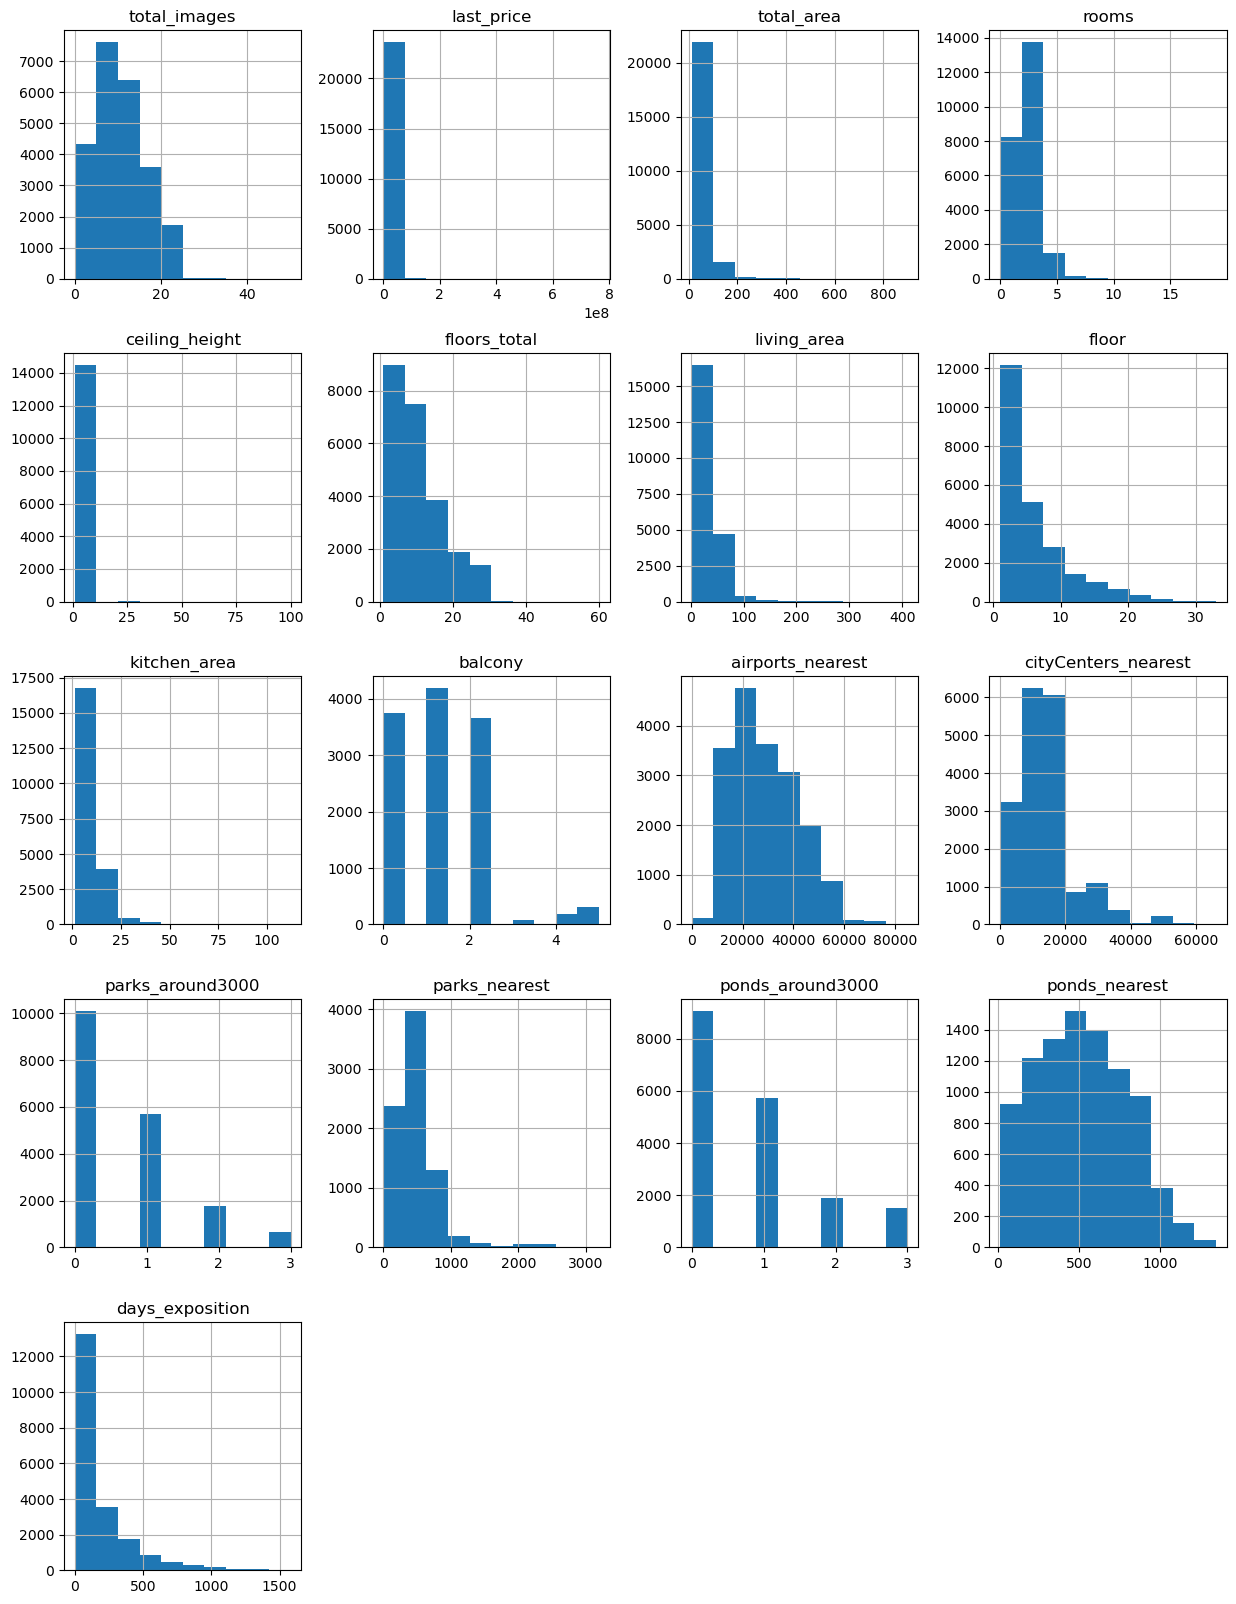

In [5]:
data.hist(figsize=(15, 20));

Проверим,есть ли в данных дубликаты(повторяющиеся строки).

In [6]:
print('Число дубликатов:', data.duplicated().sum())

Число дубликатов: 0


In [7]:
#вывод основных характеристик датасета
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


**Из основных харакетристик датасета можно увидеть следующие аномалии:**

1) last_price- минимальная стоимость недвижимости 12 190.0. Аномалия. Посмотреть сколько таких минимальных значений и исключить, если их менее 5% от выборки. Проверить гипотезу, что введены данные не в рублях а в миллионах рублей. Проверить макисмальную стоимость недвижимости в 763 000 000.0- что за объект и с какой площадью. Если средняя стоимость за км метр не соответсвкет среднему по рынку - исключить.

2) rooms- проверить миниальное значение. Аномалия или это студии? Максимальное значение-19, единичные квартиры имеют столько комнат, скорее всего это аномалия.

3) ceiling_height- минимальная высота потолков =1 метру, аномалия, максимальная высота =100 метров- аномалия. Проверить ввод данных.

4) living_area - минимальная жилая площадь 2 метра. Аномалия

5) kitchen_area- минимальная площадь кухни 1,3 метра. Аномалия

6) total_area- 900 кв.м. максимальная площадь объекта, даже для элитных квартир в Петербурге это очень много.

7) floors_total-максимальное количество этажей- 60, даже в Санкт-Петербурге не так много высотных домов, 60 этажей это слишком много для рядовой застройки.

8) airports_nearest- минимальное расстояние до аэропорта 0, квартира продается в аэропорту? это явно уникальный случай.

9) days_exposition-слишком долгий максимальны срок активности объявления,больше похоже на то, что это автоматическое продление объявления.


### 1.3 **Вывод по первичному обзору данных**

В файле содержится информация по 23699 объектам недвижимости. Для каждого объекта представлены 22 характеристики. 

У некоторых характеристик есть пропущенные значения. Необходимо выяснить природу пропущенных значений и заполнить пропуски,где это будет применимо.

Название столбца "расстояние до центра города"(cityCenters_nearest) записано не в змеином регистре, как остальные. В дальнейшем его необходимо переименовать.

Для некоторых  столбцов некорректно указан тип данных.

Явные дубликаты отсутсвуют.

По ряду признаков есть аномальные значения.

## 2 Предобработка данных

### 2.1 Приведение названия столбов к одинаковому регистру

Переименуем столбец "расстояние до центра города"(cityCenters_nearest) в соотвествии со змеиным регистром.

In [8]:
data=data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

### 2.2 Выявление пропущенных значений

Выведем данные о пропущенных значениях в каждом из столбцов.

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Выведем процент пропущенных значений из всей выборки.

In [10]:
round((data.isna().sum()*100)/len(data),2)

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
city_centers_nearest    23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

**Описание пропущеных значений**

Количество обнаруженных пропусков из 23699:

- 9195 ceiling_height - 38,8 % значений. Данные вводились вручную.Так как доля очень большая, игнорировать данные пропуски нельзя, необходимо будет заполнить. 

- 86 floors_total -  0,4% значений. Данные вводились вручную. Доля пропусков незначительна, можно исключить из выборки,так как заменить точными данными не представляется возможным. 

- 1903 living_area - 8,03% значений.Данные вводились вручную. Заполнить данные можно по данным от общей площади квартир, так как между этими показателями есть прямая зависимость.

- 2278 kitchen_area -9,61 % значений.Данные вводились вручную. Возможны пропуски, если квартира -студия, в таком случае-заполняем пропуски 0.

- 11519 balcony - 48,61% значений. Данные вводились вручную. Предположем, что отсутвие значений говорит о том, что балконов в квартире нет, заполняем 0

- 49 locality_name - 0,21% значений.Данные вводились вручную и не были заполнены, оставим незаполненным и удалим из общей выборки, так как доля составляет менее 5% и не окажет значительного влияния на результат.

- 5542 airports_nearest - 23,38% значений.Картографические данные. Аэропортов рядом нет. Оставляем пропуски так как показатели в метрах.

- 5519 city_centers_nearest - 65,91% значений. Картографические данные.Центр города не близко.Оставляем пропуски так как показатели в метрах.

- 5518 parks_around3000 - 23,28% значений.Картографические данные. В радиусе 3км нет парков.Заменяем пропущенные значения на 0.

- 15620 parks_nearest - 65,91% значений.Картографические данные.Рядом парков нет.Оставляем пропуски так как показатели в метрах.

- 5518 ponds_around3000 - 23,28% значений.Картографические данные. В радиусе 3км нет прудов или водоемов.Заменяем пропущенные значения на 0.

- 14589 ponds_nearest - 61,56% значений.Картографические данные. Нет данных о ближайших водоемах.Оставляем пропуски так как показатели в метрах.

- 3181 days_exposition - 13,42% значений. Объявление не было опубликовано, либо было снято в тот же день.

### 2.3 Заполенение пропущенных данных

#### Пропуски в столбцах "балконы", "парки" и "пруды" в радиусе 3 км

Заполняем пропуски по наличию балконов 0, так как допускаем, что пропуски говорят об отсутсвии балкона в квартире.

Заполняем пропуски значений по водоемам и паркам в радиусе 3 км на 0, так как из данных можно сделать вывод, что пропущенное значение означает отсутсвие парка или водоема.

In [11]:
#заполняем пропуски по балконам на нули
data['balcony']=data['balcony'].fillna(0)
#заполняем пропуски по паркам в радиусе 3 км на нули
data['parks_around3000']=data['parks_around3000'].fillna(0)
#заполняем пропуски по водоемам в радиусе 3 км на нули
data['ponds_around3000']=data['parks_around3000'].fillna(0)

In [12]:
# проверяем вывод пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Пропуски в столбцах "всего этажей", "название населенного пункта"

Удаляем строки с пропущенными значениями по столбцам   floors_total, locality_name, так как доля пропущенных значений составляет менее 5%(0,36% и  0,21% соответсвенно) выборки и не оказывает существенного значения на результат.

In [13]:
#удаляем строки с пропущенными значениями floors_total,locality_name
data=data.dropna(subset=['floors_total','locality_name'])

In [14]:
# проверяем вывод пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

#### Пропуски в столбце "жилая площадь"

Заполнение данных столбца "жилая площадь" (living_area).
Так как данные по размеру жилой площади в квартире напрямую сваязаны с общей площадью квартиры, рассчитаем соотношение жилой площади к общей площади по всему датасету и заполним недостающие данные.

In [15]:
#рассчитаем медианное соотношение жилой площади к общей площади
data['living_area'].fillna((data['living_area'].median() / data['total_area'].median()) * data['total_area'], inplace=True)

In [16]:
# проверяем вывод пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

#### Пропуски в столбце  "площадь кухни"

Заполним пропущенные значения в столбце "площадь кухни" (kitchen_area).

Предположим, что площадь кухни зависит от общей площади квартиры. Рассчитаем среднее значение площади кухонь по датасету в зависимости от площади квартир и заменим пропуски этими значениями.

In [17]:
data['kitchen_area'] = data.groupby(['total_area'])['kitchen_area'].apply(lambda x: x.fillna(x.median()))
data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace=True)
# проверяем вывод пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

#### Пропуски в столбце  "высота потолков"

Заменяем оставшиеся пустые значения высоты потолков на медианное значение по всему датасету в зависимости от населенного пункта и количества этажей в доме.

In [18]:
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
#|Проверяем, все ли пропущенные значения высоты потолков заменены медианными
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

#### Пропуски в столбце "апартаменты"

Заменяем пропущенные значения  в апартаментах на нет, так как это булевы значения.

In [19]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
#|Проверяем, все ли пропущенные значения высоты потолков заменены медианными
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

**Вывод**

Все столбцы с количественным типом заполнены.

Остались столбцы: airports_nearest,city_centers_nearest,parks_nearest,ponds_nearest,days_exposition.Эти данные считаю некоректно заполнять медианами или нулевыми значениями, так как столбцы, помимо days_exposition относятся к картографическим.

### 2.4 Замена типа данных

Необходимо произвести изменение типов данных в некоторых столбцах.

Самый распространенный случай в датафрейме - вещественный тип данных в тех столбцах, где должен быть целочисленный.
Тип данных в следующих столбцах должен быть изменен с float на int:
- 'balcony' (балконов не может быть 1.5),
- 'floors_total' (количество этажей не может быть 1.5),
- 'parks_around3000' и 'ponds_around3000' (количество парков и прудов не может быть 1.5).
- столбец'is_apartment', исходя из описания, имеет тип bool, а не object.

Заменим тип данных в столбце "дата публикации" (first_day_exposition) со строчного на datetime. Изменение типа first_day_exposition необходимо, чтобы работать в дальнейшем с датой.

In [20]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

Изменим тип столбца "апартаменты"(is_apartment)со строчного на логический. Изменение типа is_apartment необходимо, чтобы работать с булевым значением и сэкономить память.

In [21]:
data['is_apartment']=data['is_apartment'].astype(bool)

Приводим этажность,стоимость квартиры,количество балконов,количество парков и прудов к целочисленному типу

In [22]:
data['floors_total'] = data['floors_total'].astype(int)
data['last_price'] = data['last_price'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)


Проверим тип данных после преобразования:

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

### 2.4 Выявление неявных дубликатов данных

Ранее было выявлено, что явных дубликатов нет.

Неявные дубликаты могут встретиться в столбце "название населенного пункта"(locality_name), проверим это-выведем все уникальные значания в этом столбце.

In [24]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Определим количество значений в столбце "название населенного пункта"

In [25]:
data['locality_name'].unique().shape[0]

364

Просматривать более 350 значений довольно сложно, выделим основные возможные причины появления неявных дубликатов:

1) Заменяем разный регистр символов

2) Заменяем все "ё" на "е" (как например есть запись 'городской поселок Янино-1' и 'городской посёлок Янино-1')

3) Заменяем "городской поселок" на "поселок городского типа"


In [26]:
#Заменяем разный регистр символов
data['locality_name'] = data['locality_name'].str.lower()

In [27]:
#Заменяем все "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [28]:
#Заменяем "городской поселок" на "поселок городского типа"
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')

Проверим количество уникальных значений после преобразований

In [29]:
data['locality_name'].unique().shape[0]

323

**Вывод**

Предположение о том, что Поселок Рябово и поселок городского типа Рябово - один и тот же поселок не оправдались,это два разных местоположения. Проверено в Яндекс картах. Это опровергает предположение, что можно заменить все вариации названий "поселок" и привести к единому, так как это могут быть разные локации. Аналогично представляется некорректным удалить все названия типов населенного пункта и оставить только названия.

Перебирать руками пары похожих значений и проверять на карте представляется невозможным. Как рекомендация для дальнейшего исследования локаций- ввести доп данные с координатами, по которым можно будет идентифицировать одинаковые записи.

### 2.5 Устранение аномалий



 При первичном знакомстве с датасетом было выявлено наличие аномалий или похожих на них данных :

1) last_price- минимальная стоимость недвижимости 12 190.0. Аномалия. Посмотреть сколько таких минимальных значений и исключить, если их менее 5% от выборки. Проверить гипотезу, что введены данные не в рублях а в миллионах рублей. Проверить макисмальную стоимость недвижимости в 763 000 000.0- что за объект и с какой площадью. Если средняя стоимость за км метр не соответсвкет среднему по рынку - исключить.

2) rooms- проверить миниальное значение. Аномалия или это студии? Максимальное значение-19, единичные квартиры имеют столько комнат, скорее всего это аномалия.

3) ceiling_height- минимальная высота потолков =1 метру, аномалия, максимальная высота =100 метров- аномалия. Проверить ввод данных.

4) living_area - минимальная жилая площадь 2 метра. Аномалия

5) kitchen_area- минимальная площадь кухни 1,3 метра. Аномалия

6) total_area- 900 кв.м. максимальная площадь объекта, даже для элитных квартир в Петербурге это очень много.

7) floors_total-максимальное количество этажей- 60, даже в Санкт-Петербурге не так много высотных домов, 60 этажей это слишком много для рядовой застройки.

8) airports_nearest- минимальное расстояние до аэропорта 0, квартира продается в аэропорту? это явно уникальный случай.

9) days_exposition-слишком долгий максимальны срок активности объявления,больше похоже на то, что это автоматическое продление объявления.



#### Устранение аномалий в столбце "цена на момент снятия с публикации" (last_price)

Минимальная стоимость недвижимости 12 190.0 руб. при этом в столбце жилая площадь есть минимальное значение 2 метра, что тоже является аномалией, проверим, не в одной ли они строке, чтобы сразу удалить ее из датасета.

In [30]:
display(data.loc[data['last_price']==12190.0])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.5,0,санкт-петербург,36421.0,9176.0,1,805.0,1,NaN,8.0


Как видно из данных, общая площадь квартиры составляет 109 кв метров, вполне логично предлоложить, что цена записана некорректно. Выберем похожие объекты и посмотрим на их цену.

In [31]:
display((data.loc[(data['total_area']== 109)&(data['locality_name']=='санкт-петербург')]))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2452,7,10500000,109.0,2019-02-20,4,2.83,5,79.400000,4,False,...,9.20,0,санкт-петербург,25860.0,4708.0,0,NaN,0,691.0,NaN
3614,8,8300000,109.0,2017-09-28,3,2.60,16,68.000000,3,False,...,14.00,0,санкт-петербург,18750.0,22175.0,0,NaN,0,649.0,318.0
5035,11,13200000,109.0,2018-09-10,4,3.15,5,72.000000,2,False,...,12.20,0,санкт-петербург,42683.0,8643.0,0,NaN,0,NaN,NaN
5198,8,13500000,109.0,2018-04-01,4,3.00,7,71.000000,5,False,...,11.00,0,санкт-петербург,26191.0,4893.0,0,NaN,0,1018.0,NaN
7186,15,25000000,109.0,2018-03-23,3,3.50,6,80.000000,6,False,...,20.00,0,санкт-петербург,24904.0,5472.0,2,310.0,2,NaN,317.0
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.000000,25,False,...,40.50,0,санкт-петербург,36421.0,9176.0,1,805.0,1,NaN,8.0
10601,15,10900000,109.0,2017-02-01,3,3.00,25,49.000000,7,False,...,16.00,5,санкт-петербург,40584.0,12398.0,3,447.0,3,NaN,472.0
11843,20,16500000,109.0,2017-01-19,3,2.80,16,72.000000,3,False,...,20.00,4,санкт-петербург,18863.0,16028.0,1,482.0,1,755.0,369.0
12771,9,14400000,109.0,2019-03-14,3,2.50,21,44.800000,18,False,...,12.20,2,санкт-петербург,13275.0,12071.0,0,NaN,0,NaN,NaN
14143,20,25000000,109.0,2018-02-22,2,3.00,6,31.900000,5,False,...,43.80,0,санкт-петербург,24194.0,4327.0,0,NaN,0,NaN,370.0


Исходя из цен на похожие квартиры можем заменить значение 12190.0 руб. на 12 190 000, 00 руб. так как явно при занесении данных были потеряны разряды.

In [32]:
data=data.replace({'last_price' : { 12190.0 : 12190000.0}})

Проверим теперь минимальные и максимальные значение стоимости.

In [33]:
display(data['last_price'].describe())
data.sort_values(by='last_price').tail()

count    2.356500e+04
mean     6.540575e+06
std      1.091091e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.647000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,70.0,0,санкт-петербург,32440.0,5297.0,0,NaN,0,198.0,111.0
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,40.0,0,санкт-петербург,23011.0,1197.0,3,519.0,3,285.0,233.0
14706,15,401300000,401.0,2016-02-20,5,2.55,9,204.0,9,False,...,24.0,3,санкт-петербург,21912.0,2389.0,1,545.0,1,478.0,393.0
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,112.0,0,санкт-петербург,30706.0,7877.0,0,NaN,0,318.0,106.0
12971,19,763000000,400.0,2017-09-30,7,2.60,10,250.0,10,False,...,50.0,2,санкт-петербург,25108.0,3956.0,1,530.0,1,756.0,33.0


Теперь минимальные значения начинаются с 430000 руб., что может соответсвовать правде.

Как видно из таблицы максимальное значение стоимости сильно отличается от предпоследних, при этом размер площади объекта недвижимости не пропорционален стоимости, исключаем данное значение из массива данных, так как это явный выброс.

In [34]:
data.drop(index=data.query('last_price == 763000000.0').index,inplace=True)

Для дальнейшейго удобства построения графиков введем новый столбец в датасет- цена в млн руб.

In [35]:
data['last_price_mln']=round(data['last_price']/1000000)

#### Устранение аномалий в данных по высоте потолков

Есть предположение, что данные были введены с неправильным количеством разрядов,чтобы проверить, выведем отсортированные данные и проверим, единичный ли это случай или нет.

In [36]:
data['ceiling_height'].unique()

array([  2.7  ,   2.65 ,   2.6  ,   3.03 ,   2.625,   2.75 ,   2.5  ,
         2.67 ,   2.55 ,   2.56 ,   3.05 ,   3.   ,   2.9  ,   2.8  ,
         2.76 ,   3.2  ,   2.645,   2.61 ,   2.54 ,   3.15 ,   3.25 ,
         3.45 ,   2.77 ,   2.85 ,   2.64 ,   2.57 ,   4.15 ,   3.5  ,
         3.3  ,   2.71 ,   4.   ,   2.47 ,   2.73 ,   2.84 ,   3.1  ,
         2.675,   2.34 ,   3.4  ,   2.52 ,   3.06 ,   2.72 ,   2.51 ,
         2.78 ,  13.85 ,   2.725,  25.   ,   2.58 ,   3.7  ,  14.85 ,
         5.2  ,   2.575,   2.525,   2.745,   2.87 ,   2.66 ,   2.775,
         2.59 ,   2.   ,   2.45 ,   3.6  ,   5.   ,   2.92 ,   2.505,
         3.11 ,   3.13 ,   2.735,   3.8  ,   3.55 ,   3.16 ,   3.62 ,
         3.12 ,   2.53 ,   2.565,   2.74 ,   2.96 ,   2.46 ,   5.3  ,
         2.79 ,   2.95 ,   4.06 ,   2.94 ,   3.82 ,   3.54 ,   3.53 ,
         2.83 ,   3.325,   4.7  ,   2.4  ,   3.38 ,   3.01 ,   5.6  ,
         2.65 ,   3.65 ,   3.9  ,   3.18 ,   3.35 ,   2.3  ,   3.57 ,
         2.48 ,   2.

Из таблицы видно, что есть аномальные значение менее 2,5 метров и данные в десятичных разрядах(25,26,32 и тд). Аномалии отбросим позже. Cейчас выявим самую частую максимальную высоту и все значения больше нее из десятичного разряда приведем в порядок.

In [37]:
data.groupby('ceiling_height')['ceiling_height'].count().sort_values(ascending=False).head(20)

ceiling_height
2.50    4324
2.60    3536
2.70    2969
2.55    2087
2.75    2032
3.00    1736
2.65    1653
2.80    1076
3.20     294
3.15     279
3.10     203
2.90     184
2.76     154
2.56     151
3.30     141
3.50     130
2.77     126
2.57     116
2.85     105
2.54      95
Name: ceiling_height, dtype: int64

Из данных видно, что нормальная высота потолка варьируется между 2,5 и 3 метрами, совсем редко попадаются квартиры с потолками 3,5 метра. Нельзя иключать и пентхаусы, где высота потолков 4-5 метров, тогда получается, что высота от 25-32 метров скорее всего ошибка воода данных, скорректируем ее уменьшив число разряда.

In [38]:
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 32)]['ceiling_height']/10)

Удалим аномально низкие потолки с высотой менее 2,5 метров, предварительно проверим, сколько таких квартир. При этом сразу проверим сколько квартир с потолком выше 5 метров.

In [39]:
print('Квартир с потолками от 5м: ', data.query('ceiling_height > 5')['ceiling_height'].count())
print('Квартир с потолками меньше 2.5м : ',data.query('ceiling_height < 2.5')['ceiling_height'].count())

Квартир с потолками от 5м:  22
Квартир с потолками меньше 2.5м :  75


In [40]:
#удалим квартиры с аномальными значениями потолков
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)
data.drop(index=data.query('ceiling_height > 5').index,inplace=True)

#### Устранение аномалиий в столбце "Жилая площадь"(living_area)

По предварительному анализу минимальная жилая площадь составляет 2 кв метра, это явно аномалия, которую необходимо устранить. Выведем данные, чтобы посмотреть следующее минимальное значение и убедиться,что такое маленькое значение одно.

In [41]:
print('Квартир с жилой площадью до 5м: ', data.query('living_area < 5')['living_area'].count())

Квартир с жилой площадью до 5м:  4


Как видно из таблицы, такое значение не одно, удалим эти 4 квартиры.

In [42]:
data.drop(index=data.query('living_area < 5').index,inplace=True)

#### Удаление аномалий по количеству комнат

Минимальное количество комнат 0 , это маловероятно даже при том, что это студии или свободная планировка.
Посмотрим, сколько таких значений и удалим, если их мало.

In [43]:
print('Квартиры без комнат :',data.query('rooms == 0')['rooms'].count())

print('Квартиры без комнат и студии:',data.query('rooms == 0 and studio')['rooms'].count()) 

print('Квартиры без комнат и апартаменты:',data.query('rooms == 0 and is_apartment')['rooms'].count()) 

print('Квартиры без комнат и свободная планировка:',data.query('rooms == 0 and open_plan')['rooms'].count())

Квартиры без комнат : 192
Квартиры без комнат и студии: 133
Квартиры без комнат и апартаменты: 0
Квартиры без комнат и свободная планировка: 59


Оказывается это не аномалия и не ошибка, оставляем значения.

Дополнительные анoмалии и выбросы рассмотрим при построении гистограм по каждому признаку, при необходимости, удалим.

**Вывод:**
В первую очередь все названия столбцов были приведены к единому стилю- змеиному регистру.
    
Устранены неявные дубликаты по локации, для большей точности рекомендуется присваивать индекс или координаты, чтобы можно было идентифицировать точное местоположение локаций и исключать дубликаты незавимисо от описания локации (поселок, поселок городского типа и тд()ю

Далее были выявлены пропуски в значениях по критериям и заполнены пропуски, а также были устранены аномальные значения:

-last_price - удалены аномально большое значение и скорректирована цены, где указан был не тот разрад данных.

- ceiling_height - 38,8 % значений. Удалены аномальные значения, высота от 25 до 32 метров была приведена к меньшему разряду, так как предполагается, что допущена ошибка ввода и это значения от 2,5 до 3,2 метра.

- floors_total - 0,4% значений. Данные вводились вручную и не были заполнены, оставлены незаполненным и удалены из общей выборки, так как доля составляет менее 5%.

- living_area - 8,03% значений.Пропуки заполнены в соотвествии с долей от общей площади.

- kitchen_area -9,61 % значений. Пропуски заполенны на основании медианных значений в зависимости от общей площади и жилой площади.

- balcony - 48,61% значений. Заменены пропущенные значения на 0, так как предполагается, что отсутсвие данных=нет балкона

- locality_name - 0,21% значений.Данные вводились вручную и не были заполнены, оставлены незаполненным и удалены из общей выборки, так как доля составляет менее 5%.

- airports_nearest - 23,38% значений.Картографические данные. Аэропортов рядом нет. Оставлены пропуски так как показатели в метрах.

- city_centers_nearest - 65,91% значений. Картографические данные.Центр города не близко.Оставлены пропуски так как показатели в метрах.

- parks_around3000 - 23,28% значений.Картографические данные. В радиусе 3км нет парков.Заменены пропущенные значения на 0.

- parks_nearest - 65,91% значений.Картографические данные.Рядом парков нет.Оставлены пропуски так как показатели в метрах.

- ponds_around3000 - 23,28% значений.Картографические данные. В радиусе 3км нет прудов или водоемов.Заменены пропущенные значения на 0.

- ponds_nearest - 61,56% значений.Картографические данные. Нет данных о ближайших водоемах.Оставлены пропуски так как показатели в метрах.

- days_exposition - 13,42% значений. Объявление не было опубликовано, либо было снято в тот же день.


## 3  Добавление новых метрик в данные

### 3.1 Рассчет цены одного квадратного метра**|

In [44]:
#рассчитываем стоимость 1 квадратного метра путем деления стоимости на общую площадь
data['cost_per_sqm']=round(data['last_price']/data['total_area'])

### 3.2 День недели, месяц и год публикации объявления**

In [45]:
#день недели публикации(0 — понедельник, 1 — вторник и так далее)
data['weekday']=data['first_day_exposition'].dt.weekday
#месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month
#год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

Проверим количество пропусков данных по столбцу "days_exposiyion"в распределении по годам.

In [46]:
data[data['days_exposition'].isna()]['year'].value_counts()

2019    1780
2018     953
2017     269
2015      70
2016      67
2014      18
Name: year, dtype: int64

Как видно, после кризиса 2014 года информация о сроке размещения объявления постепенно уменьшается, пропусков в зависимости от года размещения становится все больше, возможно это свзяано с тем, что объемы продаж росли, а информативность данного показателя снижалась. Либо объявления были созданы и не были опубликлваны. в любом случае эта статистика показывает, что активность с 2014 года растет.

### 3.3 Тип этажа квартиры (значения — «первый», «последний», «другой»)

In [47]:
def floor_group(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']== row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

Для дальнейшего анализа зависимости стоимости квартир от типа этажа введем столбец с цифровым обозначением, где первый этаж=0, квартира на последнем этаже=2, все остальные=1

In [48]:
def floor_group_012(row):
    if row['floor']==1:
        return 0
    elif row['floor']== row['floors_total']:
        return 2
    else:
        return 1
data['floor_type_012'] = data.apply(floor_group_012, axis=1)

### 3.4 Расстояние до центра города в километрах 

In [49]:
data['city_centers_km'] = round(data['city_centers_nearest'] / 1000)

In [50]:
#проверим добавление столбцов
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,last_price_mln,cost_per_sqm,weekday,month,year,floor_type,floor_type_012,city_centers_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,755.0,NaN,13.0,120370.0,3,3,2019,другой,1,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,NaN,81.0,3.0,82921.0,1,12,2018,первый,0,19.0
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.300000,4,False,...,574.0,558.0,5.0,92786.0,3,8,2015,другой,1,14.0
3,0,64900000,159.0,2015-07-24,3,2.60,14,91.730769,9,False,...,234.0,424.0,65.0,408176.0,4,7,2015,другой,1,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,48.0,121.0,10.0,100000.0,1,6,2018,другой,1,8.0


Необходимые столбцы добавлены в датасет.

## 4 Проведение исследовательского анализа данных

 ### 4.1 Изучение параметров объектов

Напишем функцию для выведения коридора усов по каждому параметру, чтобы наглядно понимать, где границы "нормальных" значений для показателя.

Все данные левее левого уса ( значения меньше) и правее правого(значения больше) это аномалии. Усы- ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. 

Я предпочла посчитать значения границ усов, а не строить ящики с усами, чтобы точнее определить значения. На графиках иногда сложно сказать от какого значения начинаются нормальный разброс, может быть большая погрешность.

In [51]:
# функция, получающая на вход название признака, и возвращающая границы "усов"
def det_whiskers(column):
    stat = data[column].describe()
    
    # межквартирльный размах
    iqr = stat[6] - stat[4]
    
    # левый и правый "ус"    
    left_whisker = round(stat[4] - 1.5 * iqr, 2)
    right_whisker = round(stat[6] + 1.5 * iqr, 2)

    # левый "ус" не должен быть меньше минимального значения
    if left_whisker < stat[3]: left_whisker = stat[3] 
        
    # правый "ус" не должен быть больше максимального значения
    if right_whisker > stat[7]: right_whisker = stat[7]
        
    return [left_whisker, right_whisker]

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

Для каждого параметра буду выводить описание, строить диаграмму, считать процент аномалий и делать краткие выводы.

Основную информацию буду выводить методом  describe, где видны максимальные и минимальные значения в выборке, среднее значение и медиана, которая неподвержена влиянию выбросов ( чем сильнее она отличается от значения средней, тем больше выбросов и аномалий в параметре).

#### 4.1.1 Изучение общей площади   квартир

In [53]:
data['total_area'].describe()

count    23463.000000
mean        60.307556
std         35.492902
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

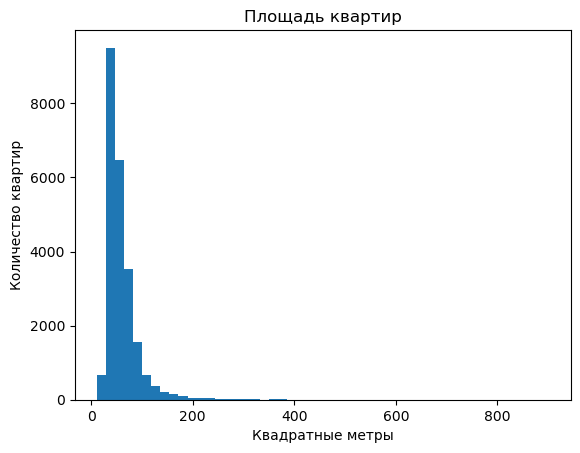

In [54]:
plt.hist(data['total_area'], bins=50)
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Как видно из гистограммы квартир меньше 10 метров нет, минимальная площадь квартиры составляет 12 кв. метров, скорее всего это не аномалия, а маленькая студия.

Основаное распределение квартир находится в диапазоне от 30 до  100 квадратных метров, все, что больше 150 метров можно смело считать элитной недвижимостью. Расмотрим ближе распределение площади до 150 метров. 

Проверим есть ли квартиры более 500 метров, помимо аномальной с площадью 900 метров, так как на гистрограмме их может быть не видно из-за небольшого количества и они сливаются с осью Х.

In [55]:
print('Квартир площадью более 500 кв.м.:',data.query('total_area > 500')['total_area'].count())


Квартир площадью более 500 кв.м.: 7


Найдено 7 квартир, это малое значение для выборки и его можно удалить.

In [56]:
data.drop(index=data.query('total_area > 500').index,inplace=True)

Построим гистограмму для площади от 10 до 150 метров, чтобы посмотреть распределение поближе.

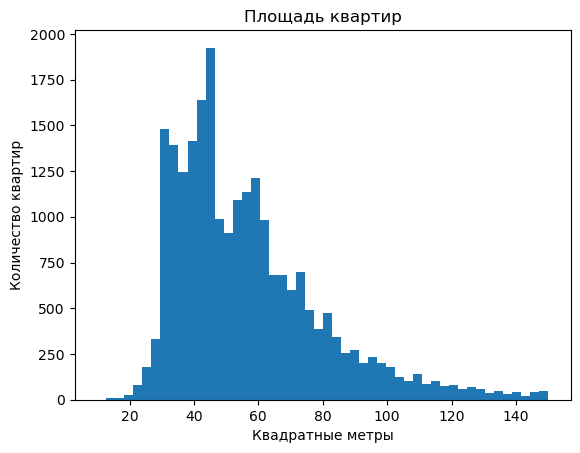

In [57]:
plt.hist(data['total_area'], bins=50, range=(10,150))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Выведем данные по усам, чтобы понять границы нормального распределения данных.

Наблюдается несколько пиков в районе 30 метров, 45, 65,75, это связано с тем, что в зависимости от количества комнат площадь отличается. Пик в райне 30 метров говорит о большом количестве студий, пик в районе 45-50 похож на двушки и далее уже идут трешки, которых закономерно меньше.

In [58]:
det_whiskers('total_area')

[12.0, 114.29]

Аномальными значениями для площади квартир буду квартиры меньше 12 метров и более 115 метров. Больше 50% объявлений описывают квартиры площадью до 52 кв. м.

Рассчитаем процент аномальных значений, чтобы понять, можно ли их удалить без вреда для дальнейшего анализа. Если процент более 5 - исключать данные нельзя.

In [59]:
# зададим функцию, вычисляющую долю аномальных значений
def print_anomalies_ratio(column):
    return 'Аномальные значения составляют {:.1%}'. format(len(data.loc[data[column] > det_whiskers(column)[1]]) / len(data)) + ' от всей выборки'
print_anomalies_ratio('total_area')

'Аномальные значения составляют 5.2% от всей выборки'

#### 4.1.2 Изучение жилой площади

In [60]:
data['living_area'].describe()

count    23456.000000
mean        34.516095
std         21.639212
min          5.000000
25%         19.000000
50%         30.000000
75%         42.115385
max        347.500000
Name: living_area, dtype: float64

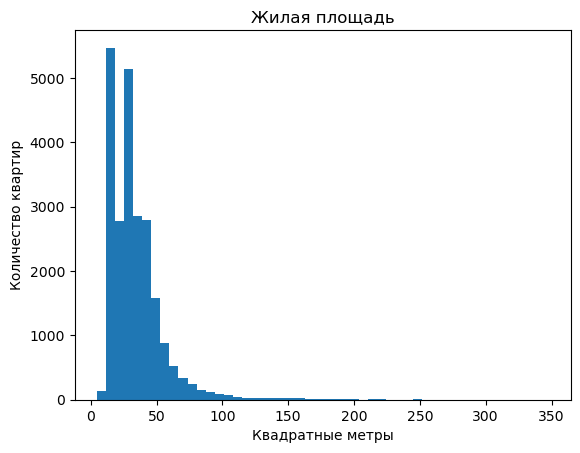

In [61]:
plt.hist(data['living_area'], bins=50)
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Как было изучено ранее, было 4 квартиры с минимальной жилой площадью- 2 кв.м. На гистрограмме видно, что квартиры с  жилой площадью менее площадью 10 кв. метров- аномалии. Проверим сколько их всего.
Также на гистограмме видны всплески значений более 200 кв. метров.Посмотрим сколько их и удалим при возможности.

In [62]:
print('Жилая площадь меньше 10 кв.м.: ',data.query('living_area < 10')['living_area'].count())
print('Жилая площадь больше 200: ',data.query('living_area > 200')['living_area'].count())

Жилая площадь меньше 10 кв.м.:  27
Жилая площадь больше 200:  34


Так как таких квартир  с жилой площадью менее 10 кв. метров всего 27 смело удаляем эти строки, так как это явная ошибка, скорее всего опечатка при занесении данных, но восстановить корректно их невозможно.
Квартир, с жилой площадью более 200 метров также немного-34. Можем удалить и те и другие из выборки.

In [63]:
data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)

Снова выведем сводные данные, чтобы ознакомиться со значениями.

In [64]:
data['living_area'].describe()

count    23395.000000
mean        34.236105
std         20.018198
min         10.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        200.000000
Name: living_area, dtype: float64

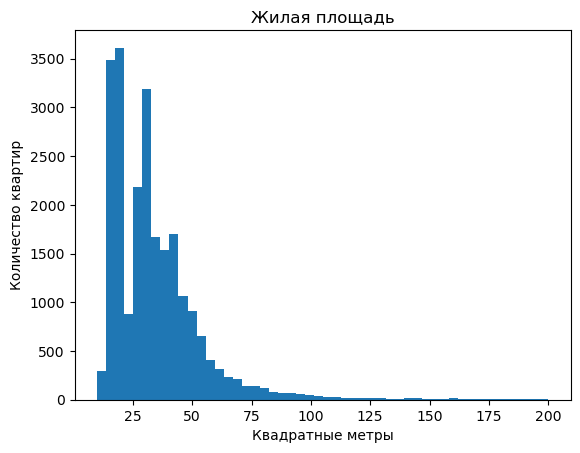

In [65]:
# построим обновленную гистограмму
plt.hist(data['living_area'], bins=50)
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [66]:
# построим усы
det_whiskers('living_area')

[10.0, 76.75]

Видно, что минимальная жилая площадь составляет 10 кв.метров, максимальнаяя теперь 200 кв. метров,медианным значением является 30 кв. метров. Согласно Усам, все квартиры с площадью жилой более 78 кв. метров- это аномалии, можем считать, что это элитная недвижимость. Построим более подробную гистограмму нормального распределения жилой площади до 80 метров.

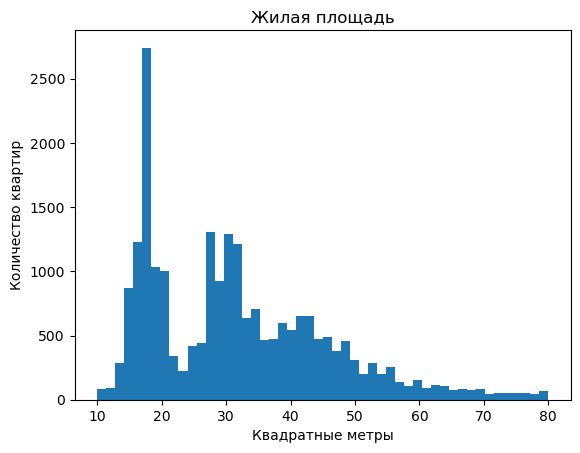

In [67]:
plt.hist(data['living_area'], bins=50, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Видно, что пик приходится на 18-19 кв. метров, что соответсвует однушкам или студиям,заметен провал в районе 24-25 метров, скорее всего это связано с планировкми квартир. У большинства объявлений жилая площадь составляет не более 30 кв.м.

In [68]:
print_anomalies_ratio('living_area')

'Аномальные значения составляют 3.6% от всей выборки'

#### 4.1.3 Изучение площади кухни

In [69]:
data['kitchen_area'].describe()

count    23395.000000
mean        10.388009
std          5.552578
min          1.300000
25%          7.000000
50%          9.000000
75%         11.700000
max        107.000000
Name: kitchen_area, dtype: float64

Из сводных данных видно, что минимальным значением площади кухни является 1,3 м. Это крайне мало, так как если бы это были студии или перепланировки там скорее всего стоял бы 0.
Явно выбивается максимальный показатель- 107 метров, посмотрим по графику, много ли квартир с такими кухнями.

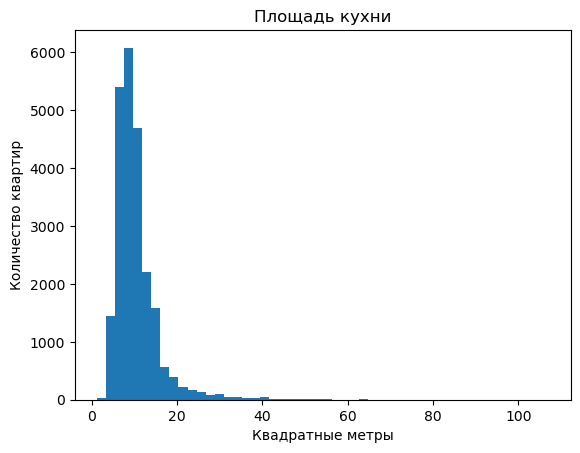

In [70]:
plt.hist(data['kitchen_area'], bins=50)
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Как видно по гистограмме кухни с площадью более 70 метров даже не заметны, и после 50 метров есть всплески, основное распределение от 5 до 15 метров. Проверим, сколько кухонь с площадью более 50 метров и менее 6метров и  удалим, если количество незначимое для выборки.

In [71]:
print('Площадь кухни больше 50 кв.м.: ',data.query('kitchen_area > 50')['kitchen_area'].count())
print('Площадь кухни меньше 5 кв.м.: ',data.query('kitchen_area < 5')['kitchen_area'].count())
print('Площадь кухни больше 5 и меньше 6 кв.м.: ',data.query('5<kitchen_area < 6')['kitchen_area'].count())

Площадь кухни больше 50 кв.м.:  38
Площадь кухни меньше 5 кв.м.:  118
Площадь кухни больше 5 и меньше 6 кв.м.:  1303


38  квартир больше 50 метров - не так много, можем смело удалять из выборки.
Кухни меньше 5 метров тоже можем удалить, а вот кухонь от 5до 6 метров уже 1303, их мы оставляем.

In [72]:
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)
data.drop(index=data.query('kitchen_area <5').index,inplace=True)

In [73]:
#границы усов
det_whiskers('kitchen_area')

[5.0, 18.75]

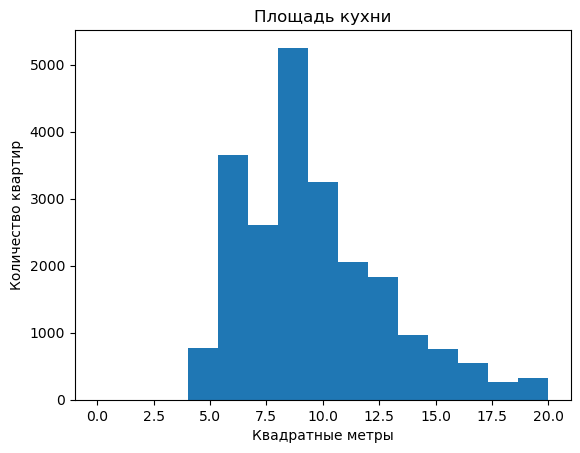

In [74]:
plt.hist(data['kitchen_area'], bins=15, range=(0,20))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Из гистограммы видно, что основная масса кухонь- 6;8 и 9 кв. метров, вполне правдивое распределение.

In [75]:
print_anomalies_ratio('kitchen_area')

'Аномальные значения составляют 5.6% от всей выборки'

#### 4.1.4 Изучение цены объекта

In [76]:
data['last_price'].describe()

count    2.323900e+04
mean     6.289170e+06
std      7.619645e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Минимальная стоимость квартир  430000 руб., что вполне похоже на правду для недвижимости в области.Максимальная стоимость 330 000 000 руб. Что весьма дорого, но в наши дни возможно, посмотрим на распределение по гистограмме.

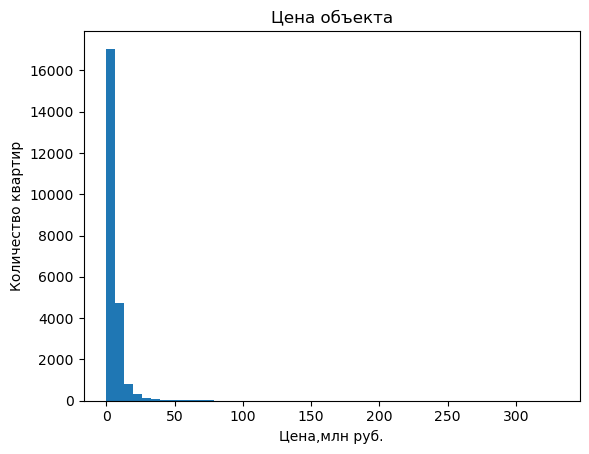

In [77]:
plt.hist(data['last_price_mln'], bins=50)
plt.title('Цена объекта')
plt.xlabel('Цена,млн руб.')
plt.ylabel('Количество квартир')
plt.show()

Основное распределение стоимостей находится от 430 000 руб. до 10 млн.
По гистограмме видно, что квартиры со стоимостью более 100 млн. руб. не видны на графике, практически сливаются с осью х. Промерим сколько их всего и удалим, если количество незначимо для выборки.

In [78]:
print('Квартир стоимостью больше 100 млн.руб.:', data.query('last_price > 100000000')['last_price_mln'].count())

Квартир стоимостью больше 100 млн.руб.: 19


In [79]:
#удаляем 19 квартир со стоимостью более 100 млн. руб.
data.drop(index=data.query('last_price > 100000000').index,inplace=True)

In [80]:
#границы усов
det_whiskers('last_price')

[430000.0, 11700000.0]

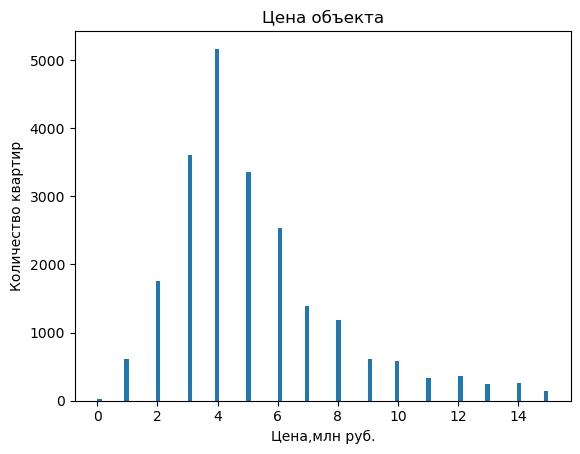

In [81]:
plt.hist(data['last_price_mln'], bins=100, range=(0,15))
plt.title('Цена объекта')
plt.xlabel('Цена,млн руб.')
plt.ylabel('Количество квартир')
plt.show()

Видно, что чаще всего стоимость квартир составляет от 3 до 6 млн, чем выше стоимость, тем реже встречаются квартиры дороже.

In [82]:
print_anomalies_ratio('last_price')

'Аномальные значения составляют 8.5% от всей выборки'

#### 4.1.5 Изучение количества комнат

In [83]:
data['rooms'].describe()

count    23220.000000
mean         2.061714
std          1.048473
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

Минимальное количество комнат- 0, как выяснили ранее- это квартиры студии и апартаменты.Максимальное значение составляет 16 коvнат, среднее и медиана-2 комнаты, посмотрим на график, как часто встречается более 3 комнат.

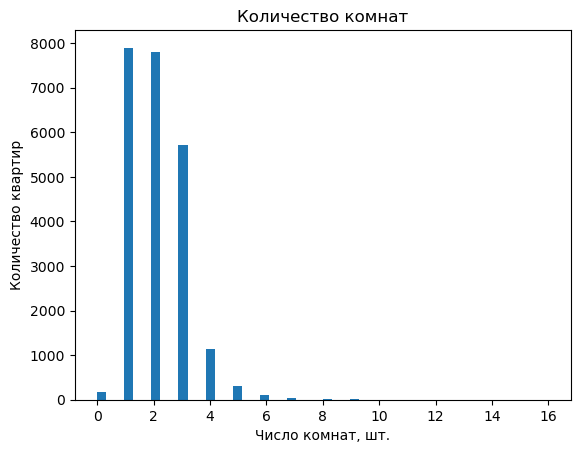

In [84]:
plt.hist(data['rooms'], bins=50)
plt.title('Количество комнат')
plt.xlabel('Число комнат, шт.')
plt.ylabel('Количество квартир')
plt.show()

Видно, что чаще всего продают однушки или студии , чуть больше двушек и трешки на третьем месте, больше 7 комнат встречается крайне редко, посчитаем сколько таких больших квартир и удалим их.

In [85]:
print('Больше 7 комнат:',data.query('rooms > 7')['rooms'].count())

Больше 7 комнат: 23


In [86]:
# удалим эти 23 огромные квартиры
data.drop(index=data.query('rooms > 7').index,inplace=True)

In [87]:
print(det_whiskers('rooms'))

[0.0, 6.0]


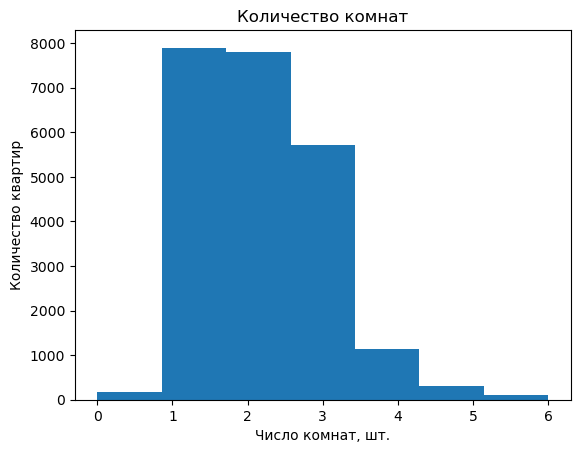

In [88]:
plt.hist(data['rooms'], bins=7, range=(0,6))
plt.title('Количество комнат')
plt.xlabel('Число комнат, шт.')
plt.ylabel('Количество квартир')
plt.show()

In [89]:
print_anomalies_ratio('rooms')

'Аномальные значения составляют 0.2% от всей выборки'

#### 4.1.6 изучение высоты потолков

[2.5, 3.05]
count    23197.000000
mean         2.705589
std          0.229687
min          2.500000
25%          2.550000
50%          2.650000
75%          2.750000
max          5.000000
Name: ceiling_height, dtype: float64


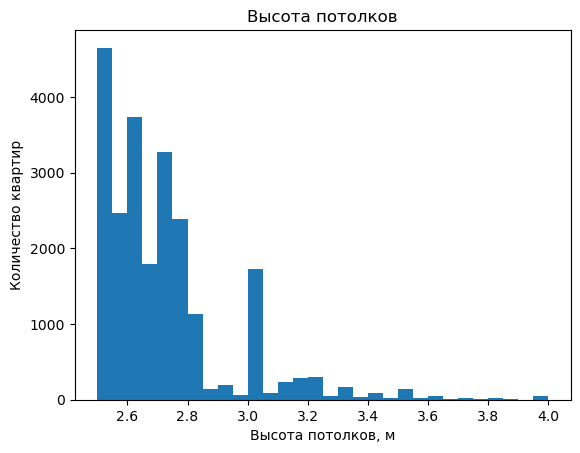

'Аномальные значения составляют 6.9% от всей выборки'

In [90]:
#границы усов
print(det_whiskers('ceiling_height'))

print(data['ceiling_height'].describe())

plt.hist(data['ceiling_height'], bins=30, range=(2.5,4))
plt.title('Высота потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество квартир')
plt.show()

print_anomalies_ratio('ceiling_height')

Как видно из гистограммы самая частая высота потолков  до 3-х метров. Сталинских домой с высокими потолками в 3 метра не так много. А выше 3,2 метра совсем редко встречаются.

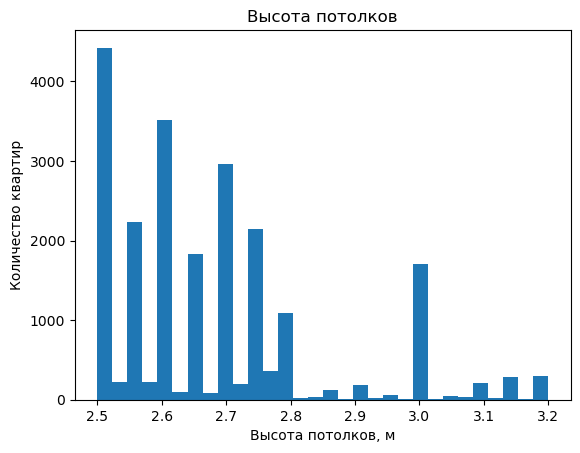

In [91]:
plt.hist(data['ceiling_height'], bins=30, range=(2.5,3.2))
plt.title('Высота потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество квартир')
plt.show()

Чаще всего встречаются квартиры с высотой 2,5 метра, далее 2,6. Высокие потолки (3метра) встречаются даже реже, чем с высотой 2,75

#### 4.1.7 Изучение этажа квартир

count    23197.000000
mean         5.890762
std          4.879507
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


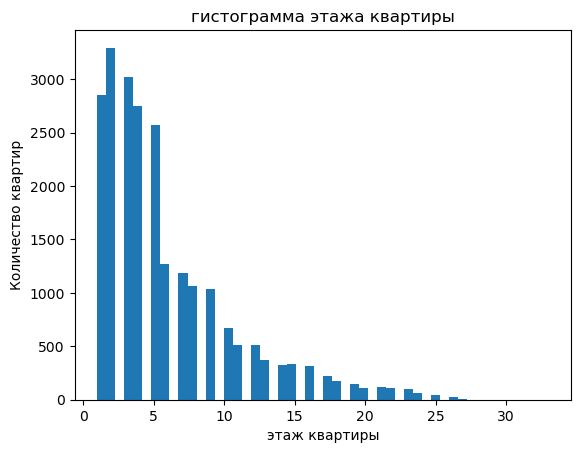

In [92]:
print(data['floor'].describe())

plt.hist(data['floor'], bins=50)
plt.title('гистограмма этажа квартиры')
plt.xlabel('этаж квартиры')
plt.ylabel('Количество квартир')
plt.show()

Как видим из гистограммы основная масса квартир продаются с первого по 4ый этаж. Квартир в многоэтажных домах намного меньше.

In [93]:
#границы усов
print(det_whiskers('floor'))

#процент аномалий из общей выборки
print_anomalies_ratio('floor')

[1.0, 17.0]


'Аномальные значения составляют 3.9% от всей выборки'

#### 4.1.8 Изучение категории этажа квартир

count      23197
unique         3
top       другой
freq       17105
Name: floor_type, dtype: object


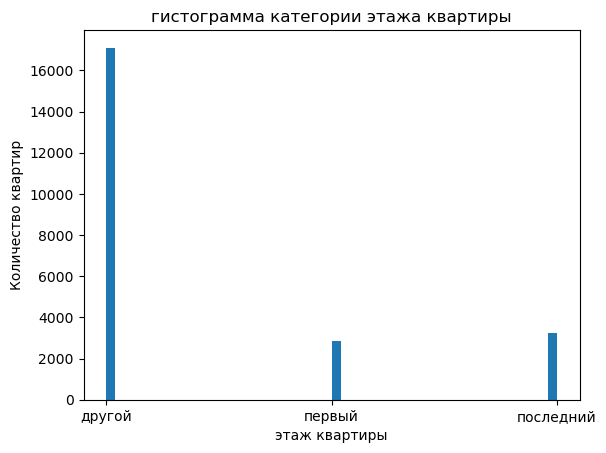

In [94]:
print(data['floor_type'].describe())

plt.hist(data['floor_type'], bins=50)
plt.title('гистограмма категории этажа квартиры')
plt.xlabel('этаж квартиры')
plt.ylabel('Количество квартир')
plt.show()

Из гистограммы видно, что в основном квартиры продаются не на первом и не на последнем этаже, такая выборка вполне логична.

#### 4.1.9 изучение этажности домов

count    23197.000000
mean        10.714704
std          6.594708
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


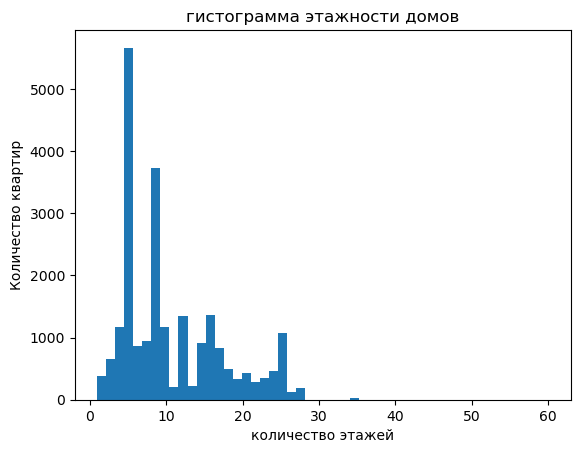

In [95]:
#вывод основных параметров
print(data['floors_total'].describe())

#построение гистрограммы
plt.hist(data['floors_total'], bins=50)
plt.title('гистограмма этажности домов')
plt.xlabel('количество этажей')
plt.ylabel('Количество квартир')
plt.show()

Как видим из гистограммы основная масса квартир- в малоэтажных домах до 9 этажей, что подтвержадет значение  медианы, макисмальное количество этажей 60.
На гистограмме видно, что количество настолько мало, что не отличимо от оси х.Посчитаем сколько таких домов и исключим из выборки. Также одноэтажные дома- большая редкость, стоимость таких квартир будет отличаться от многоэтажных домов.

In [96]:
print('Квартир в одноэтажных домах : ',data.query('floors_total == 1')['floors_total'].count())
print('Квартир в 30+ этажных домах : ',data.query('floors_total > 30')['floors_total'].count())

Квартир в одноэтажных домах :  22
Квартир в 30+ этажных домах :  30


In [97]:
#Удаляем такие квартиры
data.drop(index=data.query('floors_total > 30').index,inplace=True)
data.drop(index=data.query('floors_total == 1').index,inplace=True)

In [98]:
#границы усов
print(det_whiskers('floors_total'))

#вывод процента аномалий
print_anomalies_ratio('floors_total')

[2.0, 29.0]


'Аномальные значения составляют 0.0% от всей выборки'

#### 4.1.10  Изучение расстояния до центра города в метрах

count    17741.000000
mean     14212.713094
std       8573.003340
min        181.000000
25%       9319.000000
50%      13114.000000
75%      16275.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


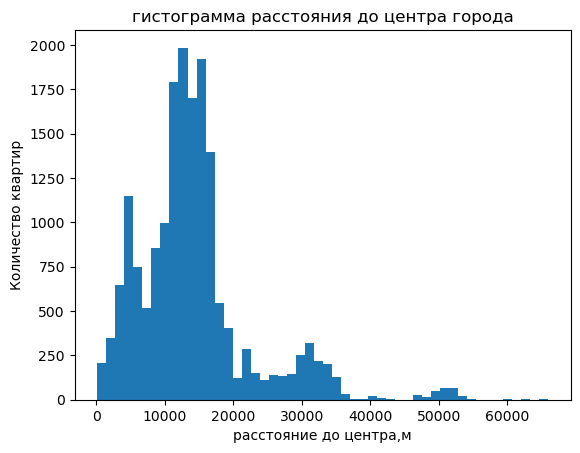

In [99]:
#вывод основных параметров
print(data['city_centers_nearest'].describe())

#построение гистрограммы
plt.hist(data['city_centers_nearest'], bins=50)
plt.title('гистограмма расстояния до центра города')
plt.xlabel('расстояние до центра,м')
plt.ylabel('Количество квартир')
plt.show()

Из гистограммы видно, что основная масса квартир находится на расстоянии от центра до 15 км.Есть квартиры, которые продаются на расстоянии более 60 км, это слишком далеко, стоимость их очень сильно отличается от городских Петергбургских квартир, так как это уже по сути другие города- спутники. Этим объясняются всплески на гистограмме.

In [100]:
#границы усов
print(det_whiskers('city_centers_nearest'))
#вывод процента аномалий
print_anomalies_ratio('city_centers_nearest')

[181.0, 26709.0]


'Аномальные значения составляют 7.4% от всей выборки'

Построим график распределения в рамках коорридора усов и посмотрим, каких квартир больше.

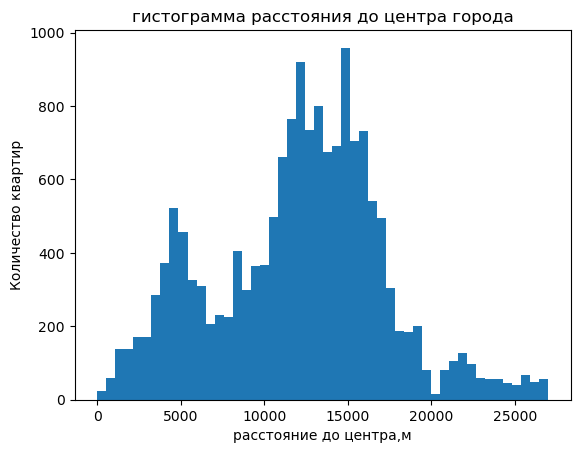

In [101]:
#построение гистрограммы
plt.hist(data['city_centers_nearest'], bins=50,range=(0,27000) )
plt.title('гистограмма расстояния до центра города')
plt.xlabel('расстояние до центра,м')
plt.ylabel('Количество квартир')
plt.show()

Видно несколько пиков- в районе 5 км от центра 12 и 15 км ближайший пригород Петербурга.

#### 4.1.11 Изучение расстояния до ближайшего аэропорта

count    17720.000000
mean     28834.197856
std      12637.201834
min          0.000000
25%      18539.000000
50%      26833.500000
75%      37354.250000
max      84869.000000
Name: airports_nearest, dtype: float64


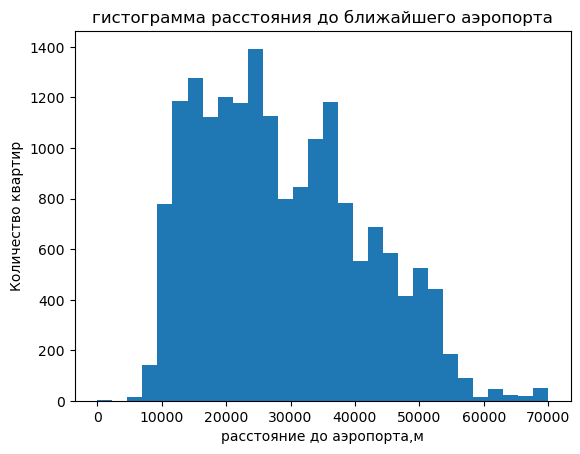

In [102]:
#вывод основных параметров
print(data['airports_nearest'].describe())

#построение гистрограммы
plt.hist(data['airports_nearest'], bins=30, range=(0,70000))
plt.title('гистограмма расстояния до ближайшего аэропорта')
plt.xlabel('расстояние до аэропорта,м')
plt.ylabel('Количество квартир')
plt.show()

Эти данные собраны автоматизированно. По гистограмме выглядят нормально. Выбивается одна строчка с airports_nearest. Квартир ближе 5 км к аэропорту одна, она похоже располагается в аэропорту. Её надо удалить. Остальные данные нормальные.

Аэропорт в Санкт-Петербурге и ЛО один - Пулково. Если учесть предыдущие выводы по приблизительному расположении квартир, то  получается, что относительно аэропорта большинство квартир будет расположено где-то от 15 до 35 км. 
Чем ближе к югу, тем ближе к аэропорту. Отсюда можно сделать вывод, что квартир для продажи больше на севере города.  Так как аэропорт находится на юге СПб, можно предположить, что большая часть объявлений ближе к северу СПб.

In [103]:
print('Квартир слишком близко к аэропорту:',data.query('airports_nearest < 5000')['airports_nearest'].count())
data.drop(index=data.query('airports_nearest < 5000').index,inplace=True)

Квартир слишком близко к аэропорту: 1


In [104]:
#границы усов
print(det_whiskers('airports_nearest'))

#вывод процента аномалий
print_anomalies_ratio('airports_nearest')

[6450.0, 65585.25]


'Аномальные значения составляют 0.4% от всей выборки'

#### 4.1.12 изучение расстояния до ближайшего парка####

count    7860.000000
mean      491.401399
std       342.531931
min         1.000000
25%       288.000000
50%       455.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64


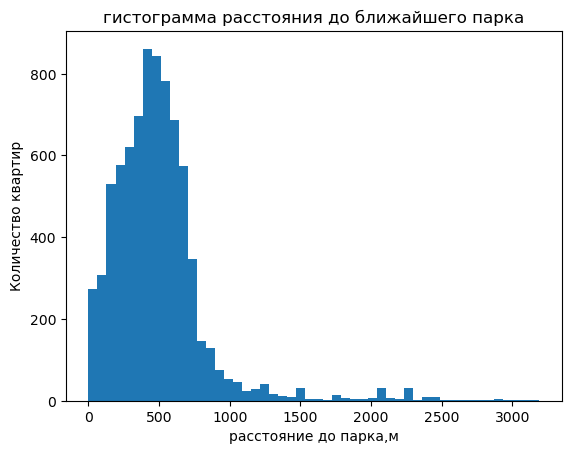

In [105]:
#вывод основных параметров
print(data['parks_nearest'].describe())

#построение гистрограммы
plt.hist(data['parks_nearest'], bins=50)
plt.title('гистограмма расстояния до ближайшего парка')
plt.xlabel('расстояние до парка,м')
plt.ylabel('Количество квартир')
plt.show()

Минимальное значение расстояния до парка 0 и таких квартир довльно много, удалять парковые квартиры не будем.Вообще, можно сказать, что пик приходится на квартиры совсем близко к паркам- 500 метров, очевидно, что для продавцов этих квартир это значимый показатель, когда квартира находится дальше от парка  в объявлении это редко указывают, так как всего число квартир с указанным расстоянием до парка чуть больше 7000. Это треть от общей выборки. Отсюда некорректно будет делать вывод, что большинство квартир находится у парков.

In [106]:
#границы усов
print(det_whiskers('parks_nearest'))

#вывод процента аномалий
print_anomalies_ratio('parks_nearest')

[1.0, 1100.5]


'Аномальные значения составляют 1.3% от всей выборки'

#### 4.1.13 изучение дня и месяца размещения объявления о продаже объекта недвижимости

Основныe характеристики дня размещения объявления
count    23144.000000
mean         2.568225
std          1.787171
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64


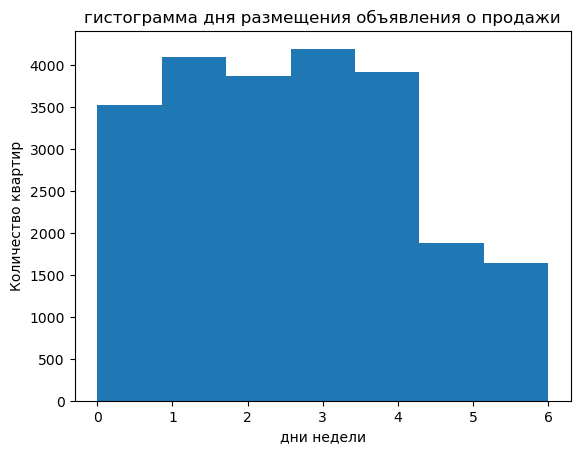

In [107]:
#вывод основных параметров
print('Основныe характеристики дня размещения объявления')
print(data['weekday'].describe())

#построение гистрограммы
plt.hist(data['weekday'], bins=7, range=(0,6))
plt.title('гистограмма дня размещения объявления о продажи')
plt.xlabel('дни недели')
plt.ylabel('Количество квартир')
plt.show()

Из гистограммы видно, что чаще всего публикуют объявления во вторник и четверг, в выходные намного меньше, так как  люди меньше просматривают объявления и занимаются своими делами.

Основныe характеристики месяца размещения объявления
count    23144.000000
mean         6.406671
std          3.492651
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


<Axes: >

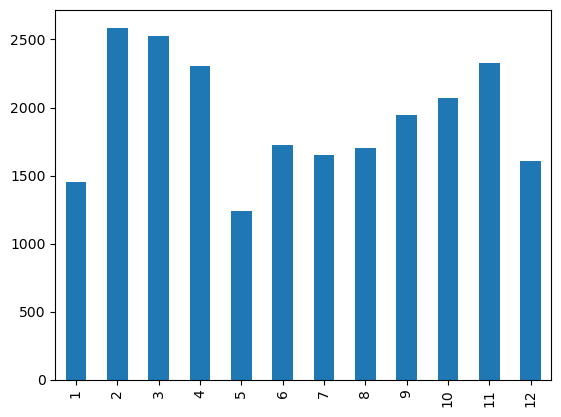

In [108]:
#вывод основных параметров
print('Основныe характеристики месяца размещения объявления')
print(data['month'].describe())

#построение гистрограммы
data['month'].value_counts().sort_index(ascending=True).plot.bar()

Из гистограммы видно, что чаще всего объявления публиковались в феврале, марте, апреле и ноябре. В первом квартале обычно люди начинают менять жизнь и улучшать свои жилищные условия после получения годовых премий.

Спад в январе, мае и декабре объясняется длительными новогодними праздниками и майскими праздниками. Летом публикации снижаются, так как многие уезжают из города- как продавцы, так и покупатели.

### 4.2 Изучение срока продажи квартир

count    20041.000000
mean       180.411207
std        219.480177
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64


Text(0, 0.5, 'Количество квартир')

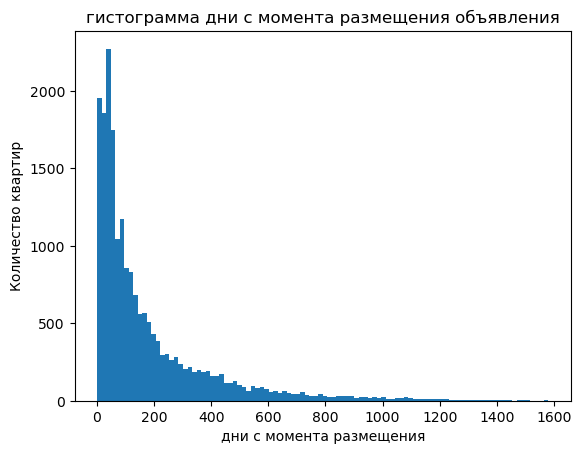

In [109]:
#вывод основных параметров
print(data['days_exposition'].describe())

#построение гистрограммы
plt.hist(data['days_exposition'], bins=100)
plt.title('гистограмма дни с момента размещения объявления')
plt.xlabel('дни с момента размещения')
plt.ylabel('Количество квартир')

Минимальное значение длительности объявления 1 день, предположим, что такое возможно,наверняка, это было супервыгодное предложение. А вот длительность более 200 дней значительно реже встречается. Из этого можно сделать вывод, что такие объявления либо слишком невыгодные по цене, непопулярности расположения или другим условиям, либо автоматически продлевались, но продажей по сути не занимались. Часто продажа квартир осуществляется в первые 2-3 месяца.

Уберем значения, которые висели более 3-х лет и выведем обновленную информацию.

In [110]:
print('Объявлению больше 3 лет : ',data.query('days_exposition > 365*3')['days_exposition'].count())

data.drop(index=data.query('days_exposition > 365*3').index,inplace=True)

Объявлению больше 3 лет :  162


In [111]:
print(data['days_exposition'].describe())

count    19879.000000
mean       171.721062
std        197.759370
min          1.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1095.000000
Name: days_exposition, dtype: float64


Можно сказать, что среднее время продажи квартиры составляет 180 день или целые полгода. Но если взять медиану - то это уже 95 дней, в два раза меньше. Почему так? Потому что у нас есть "длинный хвост" квартир, которые продавались очень долго, буквально годами.
Это наглядно показывает, как мединана устойчива к выбросам и лучше отражает реальную картину событий.
Исходя из полученных значений, можно сказать, что продажа длиною в 150 дней уже будет необычайно долгой, а продажа меньше, чем за месяц - быстрой.

In [112]:
#границы усов
print(det_whiskers('days_exposition'))

#вывод процента аномалий
print_anomalies_ratio('days_exposition')

[1.0, 496.5]


'Аномальные значения составляют 6.8% от всей выборки'

### 4.3 Факторы,влияющие на общую (полную) стоимость объекта

Для того, чтобы проверить, какие факторы влияют на общую стоимость квартиры выведем таблицу корреляций на основании данных с удаленными выбросами, но не очищенными от значений в 1,5 размаха, так как процент аномалий по размаху в некоторых параметрах превышал 5% выборки.

In [113]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,last_price_mln,cost_per_sqm,weekday,month,year,floor_type_012,city_centers_km
total_images,1.000000,0.136898,0.123856,0.102424,0.050237,0.007669,0.107934,0.030153,0.015795,-0.026168,...,0.037360,-0.003841,-0.019416,0.136362,0.134225,-0.009656,0.006799,0.136599,0.026208,-0.045484
last_price,0.136898,1.000000,0.754351,0.460864,0.408736,0.018589,0.672549,0.041950,0.029342,-0.039726,...,0.277579,-0.125083,0.109329,0.998774,0.734247,-0.003075,0.007018,-0.042171,0.057269,-0.306628
total_area,0.123856,0.754351,1.000000,0.781539,0.402616,-0.068814,0.937248,-0.027770,0.022122,-0.080961,...,0.197273,-0.094289,0.141099,0.753708,0.246887,-0.009140,0.009571,-0.074764,0.055963,-0.238343
rooms,0.102424,0.460864,0.781539,1.000000,0.220387,-0.230493,0.852607,-0.156967,-0.000294,-0.149002,...,0.146031,-0.053786,0.112851,0.460506,0.007949,-0.005032,-0.002053,-0.045246,0.019900,-0.174569
ceiling_height,0.050237,0.408736,0.402616,0.220387,1.000000,-0.040381,0.367789,-0.019458,0.063280,0.011806,...,0.252000,-0.127105,0.097146,0.408651,0.330983,-0.012120,0.002922,-0.052381,0.037372,-0.342817
floors_total,0.007669,0.018589,-0.068814,-0.230493,-0.040381,1.000000,-0.165351,0.676248,-0.024906,0.068019,...,-0.155883,0.063650,-0.053205,0.018341,0.190268,0.012336,0.017829,0.006006,-0.010186,0.011817
living_area,0.107934,0.672549,0.937248,0.852607,0.367789,-0.165351,1.000000,-0.100470,0.021784,-0.060777,...,0.202866,-0.077994,0.133804,0.672070,0.169522,-0.007221,0.003529,-0.064541,0.049961,-0.231059
floor,0.030153,0.041950,-0.027770,-0.156967,-0.019458,0.676248,-0.100470,1.000000,-0.012928,0.031788,...,-0.102651,0.043413,-0.038943,0.041771,0.155016,0.009832,0.021187,0.004573,0.314810,0.006098
is_apartment,0.015795,0.029342,0.022122,-0.000294,0.063280,-0.024906,0.021784,-0.012928,1.000000,-0.003417,...,0.013429,0.005319,0.008111,0.029692,0.032938,-0.009188,-0.000337,0.015938,0.008060,0.010682
studio,-0.026168,-0.039726,-0.080961,-0.149002,0.011806,0.068019,-0.060777,0.031788,-0.003417,1.000000,...,-0.033681,0.005919,-0.020533,-0.040445,0.020335,-0.000522,0.004228,0.007838,-0.011575,-0.009124


Как видно из таблицы основными показателями, влияющими на общую стоимость квартиры являются:
    
1) total_area — общая площадь квартиры в квадратных метрах (м²), коэф. корреляции 0.754351

2) living_area — жилая площадь в квадратных метрах (м²), коэф. корреляции 0.672549

3) kitchen_area — площадь кухни в квадратных метрах (м²), коэф. корреляции 0.554326
    
в меньшей степени на стоимость влияют следующие показатели:
4) rooms — число комнат, коэф. корреляции 0.460864
5) ceiling_height высота потолков (м), коэф. корреляции 0.408736
    
Срок размещения играет незначительную роль и коэф-т корреляции составляет 0.109329

Этажность квартиры также играет малую роль,коэф-т корреляции составляет 0.057269

Построим графики зависимости цены от вышеуказанных параметров.

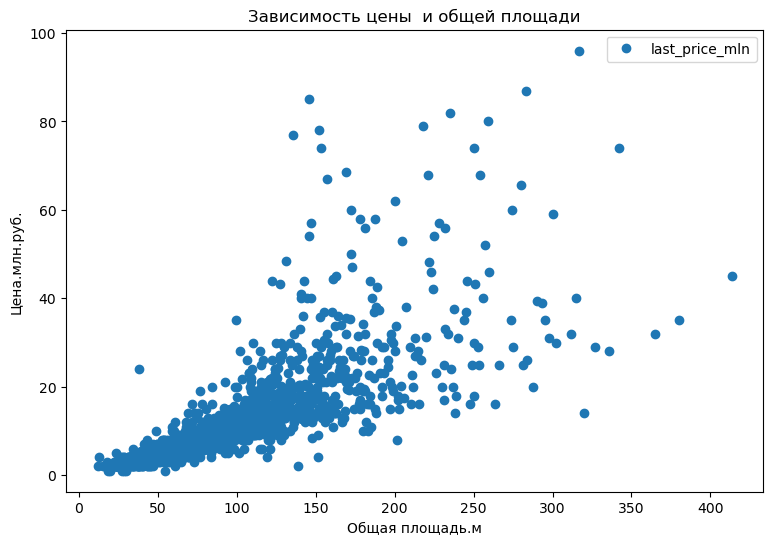

Корреляция цены  и общей площади: 0.754 



In [114]:
# Зависимость цены от  общей площади
(data.pivot_table(index='total_area', values='last_price_mln').plot(style='o', figsize=(9, 6)))
plt.title('Зависимость цены  и общей площади')
plt.xlabel('Общая площадь.м')
plt.ylabel('Цена.млн.руб.')
plt.show()
print('Корреляция цены  и общей площади:', round((data['last_price_mln'].corr(data['total_area'])),3),'\n')

Из графика видно, что зависимость линейная цены от общей площади до 120-150 кв. метров, дальше стоимость начинает сильно разбрасываться от тренда. Это говорит о бОльшем влиянии иных факторов на цену при площади недвижимости более 150 кв. метров.

Так как корреляция между общей площадью и жилой площадью близка к 1 (коэф-т корреляции составляет 0.937248), то это объясняет высокую зависимость цены от размера жилой площади.

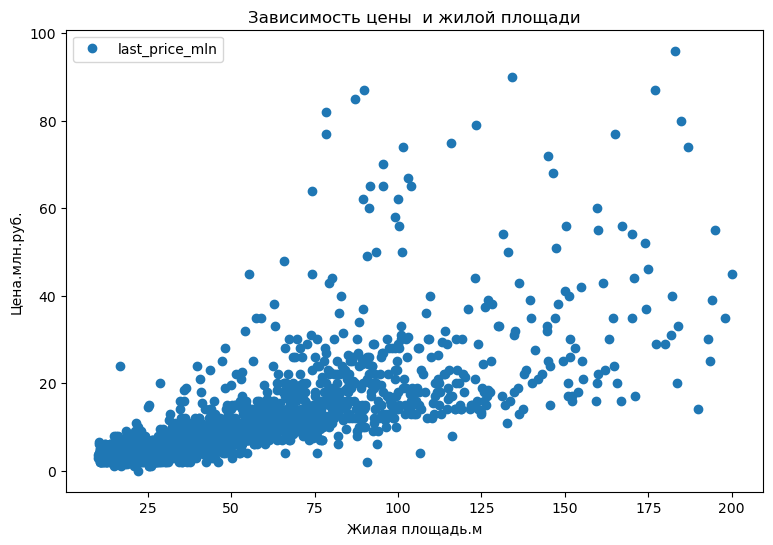

Корреляция цены и жилой площади: 0.672 



In [115]:
# Зависимость цены от жилой площади площади
(data.pivot_table(index='living_area', values='last_price_mln',aggfunc='median').plot(style='o', figsize=(9, 6)))
plt.title('Зависимость цены  и жилой площади')
plt.xlabel('Жилая площадь.м')
plt.ylabel('Цена.млн.руб.')
plt.show()
print('Корреляция цены и жилой площади:',round((data['last_price_mln'].corr(data['living_area'])),3),'\n')

Здесь наблюдается больший разброс цен в зависимости от жилой площади, но основной линейный тренд считывается до 125 кв.м

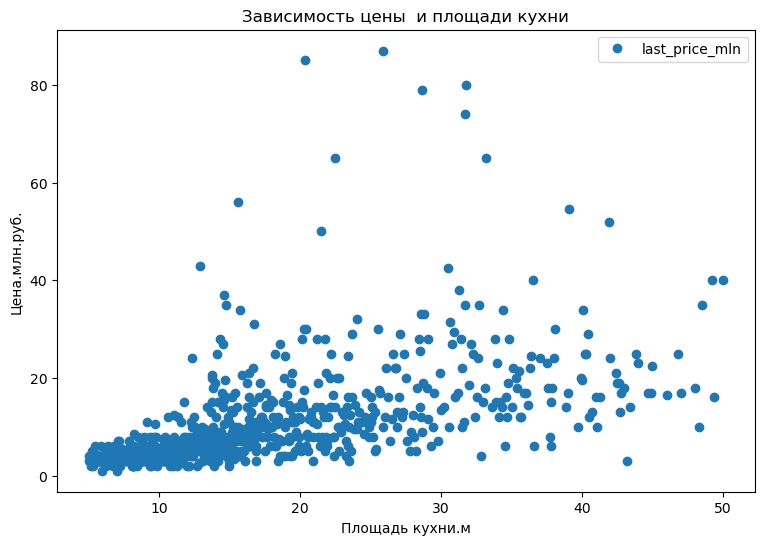

Корреляция цены и площади кухни: 0.554 



In [116]:
# Зависимость цены от площади кухни
(data.pivot_table(index='kitchen_area', values='last_price_mln',aggfunc='median').plot(style='o', figsize=(9, 6)))
plt.title('Зависимость цены  и площади кухни')
plt.xlabel('Площадь кухни.м')
plt.ylabel('Цена.млн.руб.')
plt.show()
print('Корреляция цены и площади кухни:',round((data['last_price_mln'].corr(data['kitchen_area'])),3),'\n')

Есть кухни со значением 0 и это не аномалии, это студии или апартоменты, поэтому они не противоречат факту того, что размер кухни влияет на окончательную стоимость. По сравнению с линией распределения стоимости от общей площади  зависимость цены от размера кухни более пологая (угол меньше), это как раз соотносится с коэффициентом корреляции ближе к 0,5.

Рассматривать график зависимости цены от стоимости квадратного метра нет смысла, потому что стоимость квадратного метра-созависимый показатель от самой цены и общей площади.

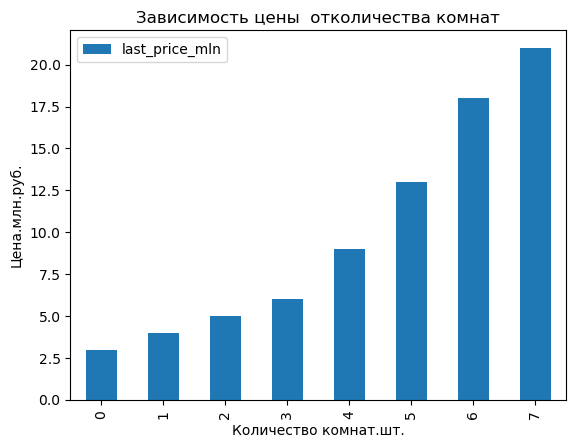

Корреляция цены и количества комнат: 0.461 



In [117]:
# Зависимость цены от количества комнат
(data.pivot_table(index='rooms', values='last_price_mln',aggfunc='median').plot(kind='bar'))
plt.title('Зависимость цены  отколичества комнат')
plt.xlabel('Количество комнат.шт.')
plt.ylabel('Цена.млн.руб.')
plt.show()
print('Корреляция цены и количества комнат:',round((data['last_price_mln'].corr(data['rooms'])),3),'\n')

На графике отчетливо видна зависимость стоимости от количества комнат, чем комнат больше, тем цена выше. Эта зависимость опять-таки от части объясняется зависимостью числа комнат от общей площади: чем больше площадь, тем больше компнат.
Видно, что 0 комнат по цене почти не отличаются от 1 комнат,это объясняется тем, что и в одной и другой категории есть студии и перепланированные квартиры или апартаменты. После 5 комнат начинаются такие площади квартир, где наличие еще одной комнаты играет меньшую роль в ценообразовании.

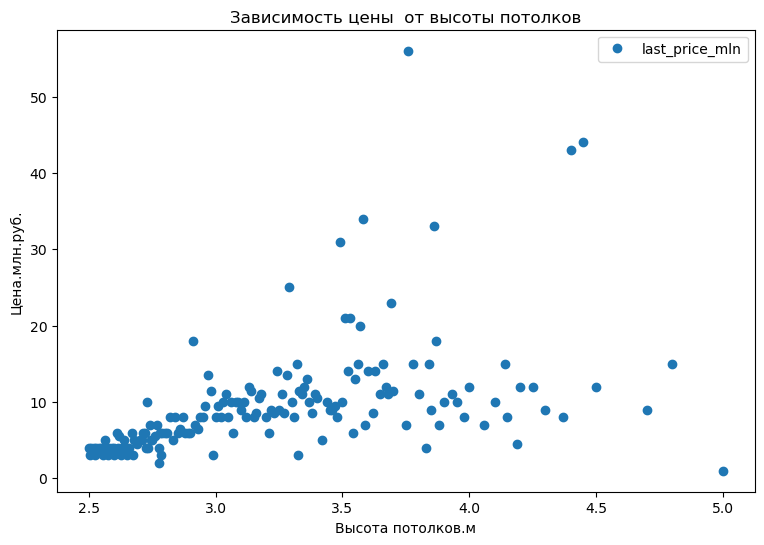

Корреляция цены и высота потолков: 0.409 



In [118]:
# Зависимость цены от высоты потолков
(data.pivot_table(index='ceiling_height', values='last_price_mln',aggfunc='median').plot(style='o', figsize=(9, 6)))
plt.title('Зависимость цены  от высоты потолков')
plt.xlabel('Высота потолков.м')
plt.ylabel('Цена.млн.руб.')
plt.show()
print('Корреляция цены и высота потолков:',round((data['last_price_mln'].corr(data['ceiling_height'])),3),'\n')

На графике видим большой разброс цен при высоте потолков более 3,2 метра. от 2,5 до 3,2 наблюдается линейная зависимость. Правда  и тут есть аномальные значения, обусловленные иными факторами. Чем выше потолок за 3 метра, тем больше разброс цен. нужно вспомнить исходные данные, такой разброс отчасти объясняется большими пропусками в начальных данных и восстановлением их по медианным значениям.

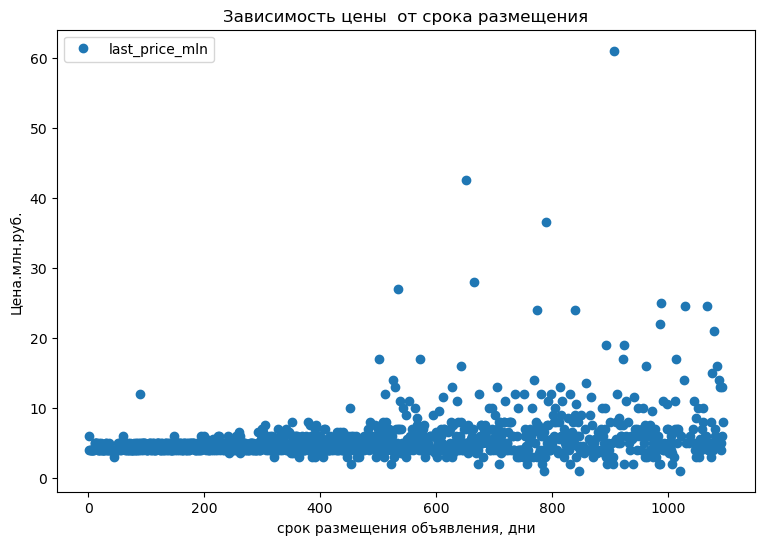

Корреляция цены и срока размещения объявления: 0.109 



In [119]:
# Зависимость цены от срока размещения
(data.pivot_table(index='days_exposition', values='last_price_mln',aggfunc='median').plot(style='o', figsize=(9, 6)))
plt.title('Зависимость цены  от срока размещения')
plt.xlabel('срок размещения объявления, дни')
plt.ylabel('Цена.млн.руб.')
plt.show()
print('Корреляция цены и срока размещения объявления:',round((data['last_price_mln'].corr(data['days_exposition'])),3),'\n')

Из графика видно, что срок размещения даже на начальном отрезке (от 0 до 200 дней) не играет большую роль в ценообразовании. Линия практически горизонтальна.

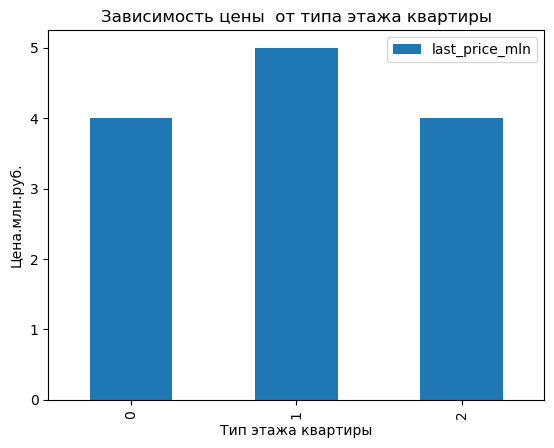

Корреляция цены и этажа квартиры: 0.057 



In [120]:
# Зависимость цены от этажа квартиры
(data.pivot_table(index='floor_type_012', values='last_price_mln',aggfunc='median').plot(kind='bar'))
plt.title('Зависимость цены  от типа этажа квартиры')
plt.xlabel('Тип этажа квартиры')
plt.ylabel('Цена.млн.руб.')
plt.show()
print('Корреляция цены и этажа квартиры:',round((data['last_price_mln'].corr(data['floor_type_012'])),3),'\n')

Из графика нельзя сделать вывод о линейной зависимости, так как при смене индексов для "первого", "последнего" и "иного этажа", столбцы располагались бы в другой последовательности. Можно сделать вывод, что цена квартир на первом этаже ниже цены квартир на последнем этаже, а больше вего ценятся квартиры на средних этажах.

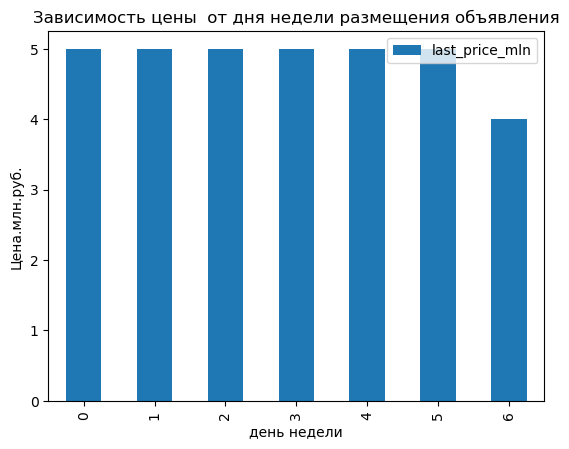

In [121]:
# Зависимость от дня размещения
(data.pivot_table(index='weekday', values='last_price_mln',aggfunc='median').plot(kind='bar',title='median'))
plt.title('Зависимость цены  от дня недели размещения объявления')
plt.xlabel('день недели')
plt.ylabel('Цена.млн.руб.')
plt.show()


Как видно из графика самая низкая цена в воскресенье, а остальные цены примерно одинаковы в зависимости от дней недели. 

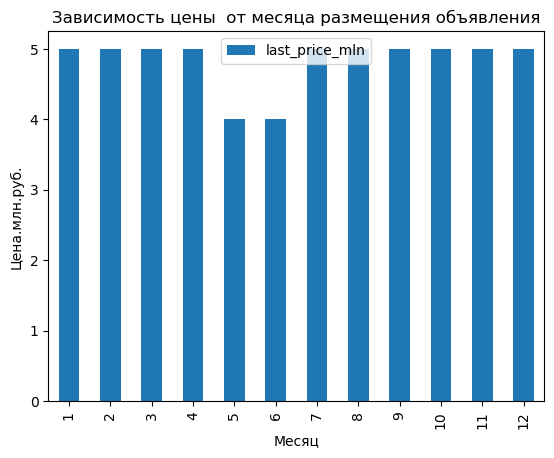

In [122]:
# Зависимость от месяца размещения
(data.pivot_table(index='month', values='last_price_mln',aggfunc='median').plot(kind='bar',title='median'))
plt.title('Зависимость цены  от месяца размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Цена.млн.руб.')
plt.show()



По графику видно, что в мае и июне самая низкая цена. Остальные месяцы разница небольшая.

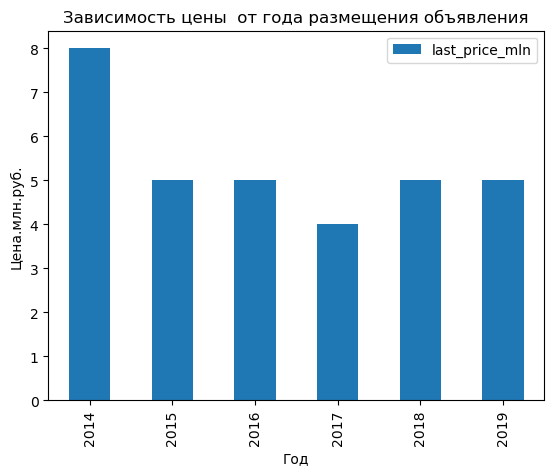

In [123]:
# Зависимость от месяца размещения
(data.pivot_table(index='year', values='last_price_mln',aggfunc='median').plot(kind='bar',title='median'))
plt.title('Зависимость цены  от года размещения объявления')
plt.xlabel('Год')
plt.ylabel('Цена.млн.руб.')
plt.show()

Квартиры очень сильно подешевели в 2015-2019 годах, что, вероятно, вызвано некоторым кризисом 2014 годa. В 2018-2019 году цены снова стали повышаться, т.к. экономика и зарплаты скорее на подъёме.

### 4.4 Анализ средней цены одного квадратного метра в топ-10 населенных пунктах

 Выведем топ 10 населенных пунктов по количеству объявлений

In [124]:
city_10=data['locality_name'].value_counts().head(10)
city_10_sqm_price = data.query('locality_name in (@city_10.index)').pivot_table(values='cost_per_sqm', index='locality_name')
city_10_sqm_price.sort_values('cost_per_sqm', ascending=False)

,cost_per_sqm
locality_name,
санкт-петербург,113212.190292
пушкин,103031.783099
деревня кудрово,92454.382550
поселок парголово,90224.021672
поселок мурино,85496.396679
поселок шушары,78474.331034
колпино,75329.928358
гатчина,68846.387417
всеволожск,68805.373096


Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также неболшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

### 4.5 Анализ средней цены квадратного метра в зависимости от удаленности от центра Санкт-Петербурга

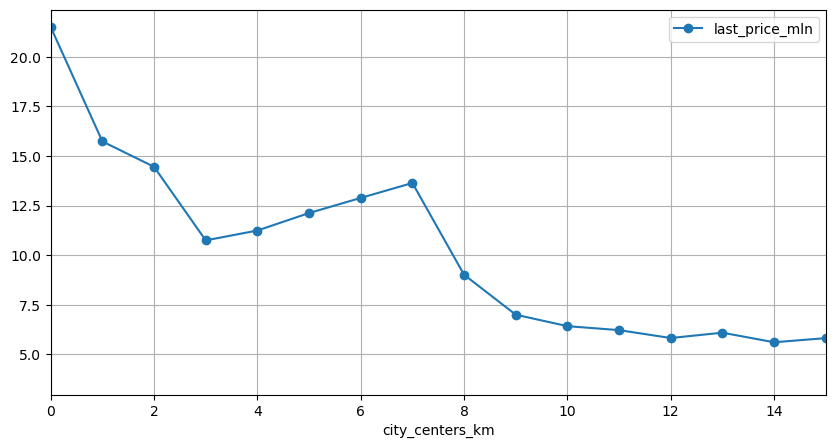

In [125]:
data.query('locality_name == "санкт-петербург"').pivot_table(index='city_centers_km', values='last_price_mln').plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
plt.show()

Видно, что самый дорогой 1ый километр от центра, начиная с 7 км цена при удалении от центра снижается.
рассмторим ближайшие к центру 7 км и посчитаем среднюю цену за каждый километр. 

In [126]:
spb_center = data.query('(locality_name == "санкт-петербург") & (city_centers_km <= 7)').pivot_table(values='last_price_mln', index='city_centers_km')
spb_center.sort_values('last_price_mln', ascending=False)

,last_price_mln
city_centers_km,
0.0,21.500000
1.0,15.731844
2.0,14.452055
7.0,13.635697
6.0,12.882653
5.0,12.120327
4.0,11.238965
3.0,10.741071


В качетсве основного показателя, характеризующего стоимость километра я взала итоговую стоимость квартир, на которю влияют и другие факторы, помимо площади квартир. 

### Общий вывод

Данная работя посвящена исследованию рынка недвижимости Санкт-Петербурга и ЛО.
Основной целью исследования стало выявление основных факторов, оказывающих влияние на конечную стоимость недвижимости.

Работа выполнялась в несколько этапов: ознакомление с первичными данными, предобработка первичных данных, анализ данных, поиск зависимостей между ценой и характеристиками.


**Рекомендация для подготовки датасетов к анализу**

В исходных данных были пропуски значений практически по всем столбцам их нужно было было заполнить. Количественные показатели можно заполнить расчетными даннами, а вот с картографическими так делать нельзя. Вся недвижимость регистрируется - есть общая база с кадастровыми номерами, где есть данные по расположению, типу дома и локации.
 
**Предложение** Добавить в данные столбце по адресу дома, чтобы можно было точно идетифицировать локацию, этажность, высоту потолков, средние параметры кухни по плану и т.д. Такие данные помогут сделать расчеты более точными и анализ достовернее. Также адрес поможет точно идетифицировать населенный пункт, это необходимо для исключения неявных дубликатов.

**Основные выводы по работе:** 


**1. Изучение параметров: площади, цены, числа комнат, высоты потолков, срока продажи квартиры**

Средняя квартира, выставленная на продажу, имеет следующие характеристики: это 2-комнатная квартира на 4-м этаже в 9-ти этажном доме .Площадь 52 кв. м, жилая площадь-30 м. кв., кухня- 9 кв. м, с потолками 2,65 м, продана за 3 месяца (95 дней) по цене 4,7 млн. рублей.

Аномальные характеристики квартир из представленного набора данных:

- общая площадь- менее 12 и более 114,3 кв. м
- жилая площадь- менее 10 и более 76.75 кв. м
- площадь кухни- менее 5 и более 18.75 кв. м
- цена - менее 430 000 руб. и более 11,7 млн. руб.
- комнат более 6
- высота потолков менее 2,5 и более 3,05 м.
- квартира выше 17 этажа в доме с более 30-ю этажами
- удаленность от центра более чем на 26,7 км
- удаленная от аэропорта более чем на 65,5 км, и не ближе 6,4 км
- проданная за 497 дней или более



Чаще всего объявления публикуются в будни, вероятно, из-за часов работы риелторов, а также ближе к НГ и после него, вероятно, обусловлено психологическими факторами и годовыми премиями, люди склонны менять что-то в жизни в этот период. 
В мае продажи падают - люди уезжают отдыхать или на дачу, в январе такая же ситуация - люди тоже отдыхают. 


Срок продажи квартиры.
Как правило, продажа недвижимости занимала 3 месяца (95 дней). При этом четверть всех объектов недвижимости была продана в течение 45 дней с момента публикации. Если объект был продан в течение месяца, то необходимо проверить данную сделку на предмет мошенничества. Такая проверка особенна критична, если срок сделки не превышает двух недель. Кроме того, если объект был продан только после 497 дней с момента публикации, это говорит об аномально долгой продаже.

 
Больше всего объявлений приходится на СПб и близжайшие крупные населенные пункты. Самая дорогая недвижимость при этом в Зеленогорске - объясняется расположением, а самая дешевая - в Старополье, что также объясняется расположением и величиной населенного пункта.


**2. Факторы, влияющие на стоимость квартиры**

Цена по убыванию зависит от:

- общей площади- коэф. корреляции 0.754351;
- жилой площади- коэф. корреляции 0.672549;
- площади кухни- коэф. корреляции 0.554326;
- количества комнат-коэф. корреляции 0.460864
- высота потолков- коэф. корреляции 0.408736


Цена практически на зависит от:

- этажа, на котором расположена квартира- коэф. корреляции 0.057269
- даты размещения- коэф. корреляции 0.109329


Расстояние до центра города также, очевидно, влияет на стоимость квартиры, но в общей массе данных коэфф. корреляции составляет -0.306200.

Этот факт расходится с выводами о стоимости квартир в центре петербурга, там чем ближе к историчесткому центру, тем дороже цена в пределах 6 км. Отсюда можно сделать вывод, что факторы влияющие на стоимость недвижимости по-разному влияют в зависимости Петербург это или ЛО.

Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах.

Cамая низкая цена в воскресенье, а остальные цены примерно одинаковы по дням недели.
В мае и июне самая низкая цена. Остальные месяцы разница небольшая.
Квартиры очень сильно подешевели в 2015-2019 годах, что, вероятно, вызвано некоторым кризисом 2014 годa. В 2018-2019 году цены снова стали повышаться, т.к. экономика и зарплаты скорее на подъёме.

**3. 10 населенных пунктов с наибольшим числом объявлений**

Из представленных 10 населенных пунктов с наибольшим числом объявлений лидеры по средней цене квадратного метра: Санкт-Петербург, Пушкин, деревня Кудрово и поселок Парголово.

Однако в среднем дешевле всего квадратные метры в Выборге и Всеволожске.
